# Import

In [10]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import numpy as np
import pandas as pd

import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

# import seaborn as sns
import seaborn as sns

# importing the statistics module
import statistics

import joblib


In [11]:
# read fold for check
f1 = pd.read_csv("../Anny_oversampling/fold1.csv")
f2 = pd.read_csv("../Anny_oversampling/fold2.csv")
f3 = pd.read_csv("../Anny_oversampling/fold3.csv")
f4 = pd.read_csv("../Anny_oversampling/fold4.csv")
f5 = pd.read_csv("../Anny_oversampling/fold5.csv")

# read raw data
raw_data = pd.read_csv("../raw_data/data.csv")

# Review

In [30]:
# run it once
raw_data = raw_data.drop(labels='Unnamed: 32', axis=1)
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [31]:
print("########## the fold ############")
print("fold1: "+ str(len(f1)))
print("fold2: "+ str(len(f2)))
print("fold3: "+ str(len(f3)))
print("fold4: "+ str(len(f4)))
print("fold5: "+ str(len(f5)))
print("\ntotal: " + str(len(f1) + len(f2) + len(f3) + len(f4) + len(f5)))
print("################################")

########## the fold ############
fold1: 91
fold2: 91
fold3: 91
fold4: 91
fold5: 91

total: 455
################################


In [32]:
y_f1 = f1[f1.columns[1]]
le = LabelEncoder()
y_f1 = np.array(le.fit_transform(y_f1))
print(le.classes_)
y_f2 = f2[f2.columns[1]]
le = LabelEncoder()
y_f2 = np.array(le.fit_transform(y_f2))
print(le.classes_)
y_f3 = f3[f3.columns[1]]
le = LabelEncoder()
y_f3 = np.array(le.fit_transform(y_f3))
print(le.classes_)
y_f4 = f4[f4.columns[1]]
le = LabelEncoder()
y_f4 = np.array(le.fit_transform(y_f4))
print(le.classes_)
y_f5 = f5[f5.columns[1]]
le = LabelEncoder()
y_f5 = np.array(le.fit_transform(y_f5))
print(le.classes_)

['B' 'M']
['B' 'M']
['B' 'M']
['B' 'M']
['B' 'M']


In [33]:
# check balance in each fold
print("------ fold ------")
print("f1 positive: " + str(sum(y_f1)))
print("f1 negative: " + str(len(f1) - sum(y_f1)))
print("------------------")
print("f2 positive: " + str(sum(y_f2)))
print("f2 negative: " + str(len(f2) - sum(y_f2)))
print("------------------")
print("f3 positive: " + str(sum(y_f3)))
print("f3 negative: " + str(len(f3) - sum(y_f3)))
print("------------------")
print("f4 positive: " + str(sum(y_f4)))
print("f4 negative: " + str(len(f4) - sum(y_f4)))
print("------------------")
print("f5 positive: " + str(sum(y_f5)))
print("f5 negative: " + str(len(f5) - sum(y_f5)))
print("------------------")

------ fold ------
f1 positive: 39
f1 negative: 52
------------------
f2 positive: 38
f2 negative: 53
------------------
f3 positive: 25
f3 negative: 66
------------------
f4 positive: 19
f4 negative: 72
------------------
f5 positive: 23
f5 negative: 68
------------------


# Define function

In [12]:
# # tn, fp, fn, tp = each_index(cm)
def each_index(metrix):
    TN = metrix[0][0]
    FP = metrix[0][1]
    FN = metrix[1][0]
    TP = metrix[1][1]
    return TN, FP, FN, TP

In [13]:
def sensitivity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) * 100
    print("Sensitivity: %.2f%%" % sensitivity)
    return sensitivity

In [14]:
def specificity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate specificity
    specificity = TN / (TN + FP) * 100
    print("Specificity: %.2f%%" % specificity)
    return specificity

In [15]:
def accuracy(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) *100
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy

In [16]:
def precision(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    precision = (TP / (TP + FP)) *100
    print("Precision: %.2f%%" % precision)
    return precision

In [17]:
def f1(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate f1
    recall = sensitivity(metrix)
    pre = precision(metrix)
    f1 = ((2*pre*recall) / (pre+recall))
    print("F1: %.2f%%" % f1)
    return f1

# Setting

In [74]:
# setting split and path
split = 'split5'
path = "../Anny_oversampling/DATA/"
train_path = "{}/{}/train/oversampled_train_{}.csv".format(path,split,split)
test_path =  "{}/test.csv".format(path)
valid_path = "{}/{}/val/val_{}.csv".format(path,split,split)

In [75]:
# check if path is correct
print(train_path)
print(test_path)
print(valid_path)

../Anny_oversampling/DATA//split5/train/oversampled_train_split5.csv
../Anny_oversampling/DATA//test.csv
../Anny_oversampling/DATA//split5/val/val_split5.csv


In [76]:
# Load the train set
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

(486, 32)
(486, 30)
['B' 'M']


In [77]:
# Load the test set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[3:]]
print(x_test.shape)
y_test = test_data[test_data.columns[2]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

(114, 33)
(114, 30)
['B' 'M']


In [78]:
# Load the validation set
val_data = pd.read_csv(valid_path)
print(val_data.shape)
x_val = val_data[val_data.columns[2:]]
print(x_val.shape)
y_val = val_data[val_data.columns[1]]
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

(91, 32)
(91, 30)
['B' 'M']


In [79]:
# check balance in this split
print(split)
print("train positive:    " + str(sum(y_train)))
print("validate positive: " + str(sum(y_val)))

split5
train positive:    243
validate positive: 23


In [80]:
# Define a custom dataset class
class WisconsinDataset(Dataset):
    def __init__(self, x, y):
        self.X = x.values
        self.y = y
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.int64)
        
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [81]:
batch = 1
# Initialize the datasets and data loaders
val_dataset = WisconsinDataset(x_val, y_val)
train_dataset = WisconsinDataset(x_train, y_train)
test_dataset = WisconsinDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1)
val_loader = DataLoader(val_dataset, batch_size=batch)

In [82]:
dataloaders = {
    'train': train_loader
    , 'valid': val_loader}

In [83]:
print("######### Check balance! ##########")
print(split)
# train
count_train = 0
for image,label in train_dataset:
    count_train = count_train + label
print("Train have abnormal: {}".format(count_train))
print("Train have normal: {}".format(len(train_dataset) - count_train))
print(" * Train difference: {}".format(abs(len(train_dataset) - (2*count_train))))
# val
count_val = 0
for image,label in val_dataset:
    count_val = count_val + label
print("Validate have abnormal: {}".format(count_val))
print("Validate have normal: {}".format(len(val_dataset) - count_val))
print(" * Validate difference: {}".format(abs(len(val_dataset) - (2*count_val))))
# test
count_test = 0
for image,label in test_dataset:
    count_test = count_test + label
print("Test have abnormal: {}".format(count_test))
print("Test have normal: {}".format(len(test_dataset) - count_test))
print(" * Test difference: {}".format(abs(len(test_dataset) - (2*count_test))))
print("####################################")

######### Check balance! ##########
split5
Train have abnormal: 243
Train have normal: 243
 * Train difference: 0
Validate have abnormal: 23
Validate have normal: 68
 * Validate difference: 45
Test have abnormal: 68
Test have normal: 46
 * Test difference: 22
####################################


In [84]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_val = sc.fit_transform(x_val)

In [561]:
# Define parameter grid
param_grid = {'loss': ['hinge', 'modified_huber', 'log_loss'],
              'penalty': ['l2', 'l1', 'elasticnet'],
              'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'eta0': [0.001, 0.01, 0.1, 1.0],
              'max_iter': [1000, 2000, 5000],
              'alpha': [10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1]}

# Define SGD model
sgd_model = SGDClassifier()

# Define grid search object
grid_search = GridSearchCV(sgd_model, param_grid, cv=5)

# Fit grid search object to the data
grid_search.fit(x_val, y_val)

loss = grid_search.best_params_['loss']
penalty = grid_search.best_params_['penalty']
learning_rate = grid_search.best_params_['learning_rate']
eta0 = grid_search.best_params_['eta0']
max_iter = grid_search.best_params_['max_iter']
alpha = grid_search.best_params_['alpha']

# Compare parameter

## Parameter set 1

In [182]:
# Print best parameter and score
print('Best loss parameter:', loss)
print('Best penalty parameter:', penalty)
print('Best learning_rate parameter:', learning_rate)
print('Best eta0 parameter:', eta0)
print('Best max_iter parameter:', max_iter)
print('Best alpha parameter:', alpha)
print('Best score:', grid_search.best_score_)

Best loss parameter: hinge
Best penalty parameter: l2
Best learning_rate parameter: optimal
Best eta0 parameter: 0.1
Best max_iter parameter: 2000
Best alpha parameter: 1e-07
Best score: 0.9888888888888889


In [183]:
# create the individual models
sgd_model = SGDClassifier(loss='hinge', penalty='l2', learning_rate='optimal', eta0=0.1, max_iter=2000, alpha=1e-07)
sgd_model.fit(x_train, y_train)

SGDClassifier(alpha=1e-07, eta0=0.1, max_iter=2000)

In [184]:
model_path = "../SGD/models/param1/sgd_model_{}.pkl".format(split)

In [185]:
# Save the trained model to disk
joblib.dump(sgd_model, model_path)

['../SGD/models/param1/sgd_model_split5.pkl']

In [186]:
# Load the saved model from disk
sgd_model = joblib.load(model_path)

### split1

split1
############## validate set ################
Confusion Matrix
----------------
[[46  6]
 [ 1 38]] 

----------------
Sensitivity: 97.44%
Specificity: 88.46%
Accuracy: 92.31%
Precision: 86.36%
Sensitivity: 97.44%
Precision: 86.36%
F1: 91.57%


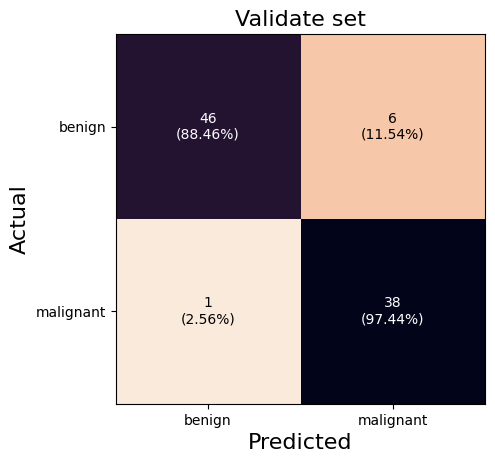

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 8 60]] 

----------------
Sensitivity: 88.24%
Specificity: 97.83%
Accuracy: 92.11%
Precision: 98.36%
Sensitivity: 88.24%
Precision: 98.36%
F1: 93.02%


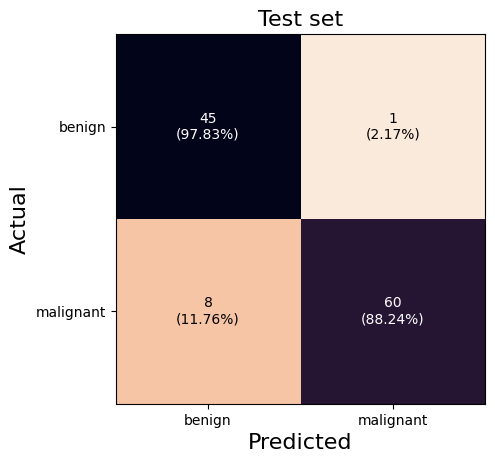

---------------------------------------
AUC validate: 0.9295
AUC test: 0.9303


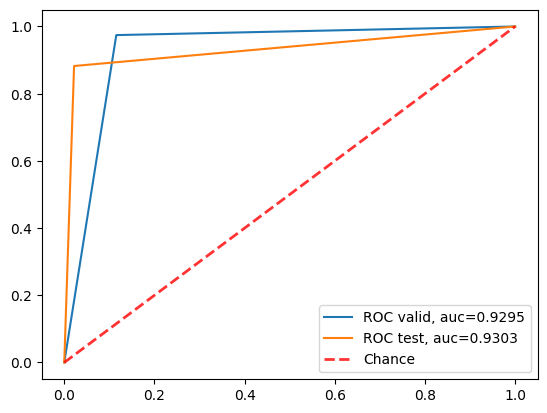

In [118]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split1 = sensitivity(cm_test)
spec_test_split1 = specificity(cm_test)
acc_test_split1 = accuracy(cm_test)
pre_test_split1 = precision(cm_test)
f1_test_split1 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split1 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split1)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split1))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split2

split2
############## validate set ################
Confusion Matrix
----------------
[[49  4]
 [ 2 36]] 

----------------
Sensitivity: 94.74%
Specificity: 92.45%
Accuracy: 93.41%
Precision: 90.00%
Sensitivity: 94.74%
Precision: 90.00%
F1: 92.31%


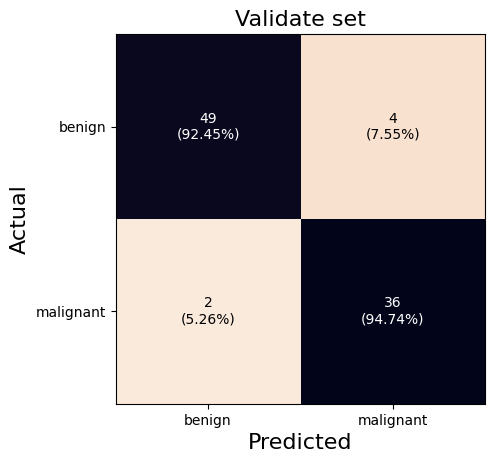

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 7 61]] 

----------------
Sensitivity: 89.71%
Specificity: 97.83%
Accuracy: 92.98%
Precision: 98.39%
Sensitivity: 89.71%
Precision: 98.39%
F1: 93.85%


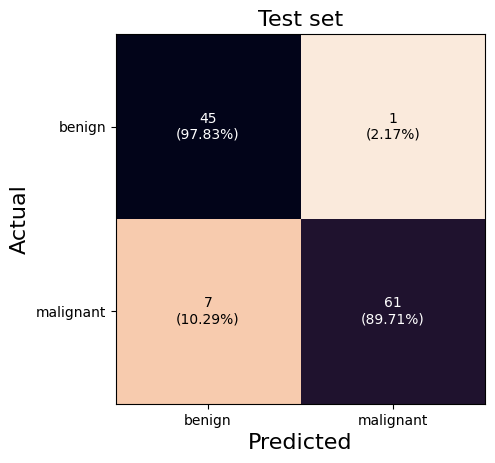

---------------------------------------
AUC validate: 0.9359
AUC test: 0.9377


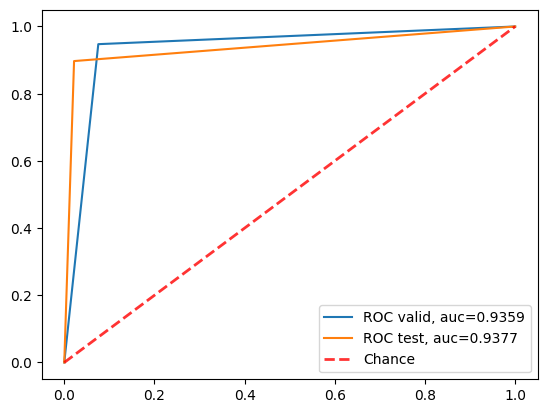

In [135]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()


################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split2 = sensitivity(cm_test)
spec_test_split2 = specificity(cm_test)
acc_test_split2 = accuracy(cm_test)
pre_test_split2 = precision(cm_test)
f1_test_split2 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split2 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split2)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split2))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split3

split3
############## validate set ################
Confusion Matrix
----------------
[[56 10]
 [ 1 24]] 

----------------
Sensitivity: 96.00%
Specificity: 84.85%
Accuracy: 87.91%
Precision: 70.59%
Sensitivity: 96.00%
Precision: 70.59%
F1: 81.36%


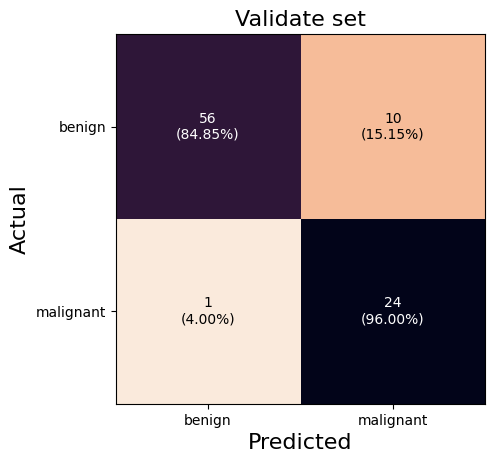

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 4 64]] 

----------------
Sensitivity: 94.12%
Specificity: 97.83%
Accuracy: 95.61%
Precision: 98.46%
Sensitivity: 94.12%
Precision: 98.46%
F1: 96.24%


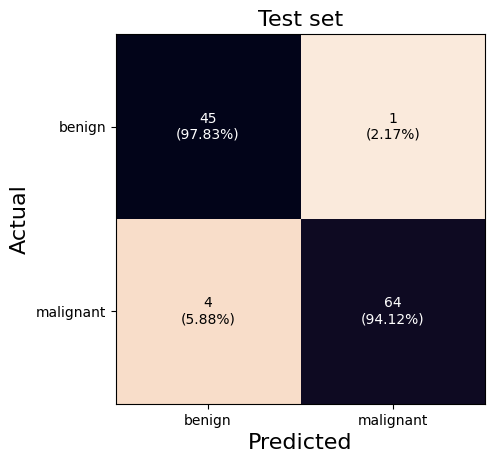

---------------------------------------
AUC validate: 0.9042
AUC test: 0.9597


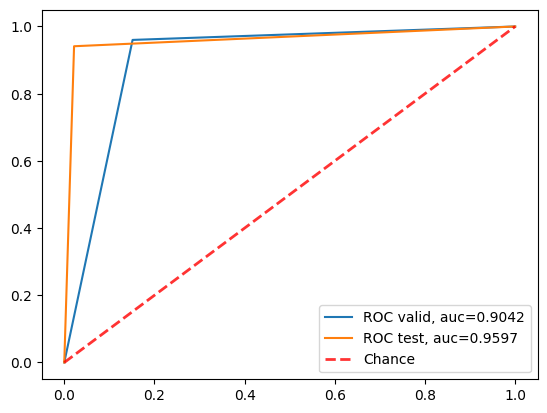

In [152]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split3 = sensitivity(cm_test)
spec_test_split3 = specificity(cm_test)
acc_test_split3 = accuracy(cm_test)
pre_test_split3 = precision(cm_test)
f1_test_split3 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split3 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split3)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split3))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split4

split4
############## validate set ################
Confusion Matrix
----------------
[[50 22]
 [ 0 19]] 

----------------
Sensitivity: 100.00%
Specificity: 69.44%
Accuracy: 75.82%
Precision: 46.34%
Sensitivity: 100.00%
Precision: 46.34%
F1: 63.33%


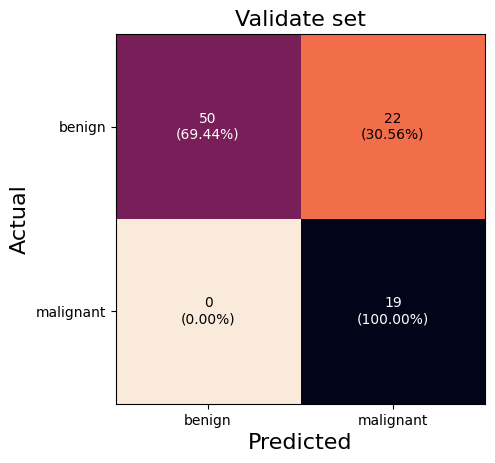

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 3 65]] 

----------------
Sensitivity: 95.59%
Specificity: 97.83%
Accuracy: 96.49%
Precision: 98.48%
Sensitivity: 95.59%
Precision: 98.48%
F1: 97.01%


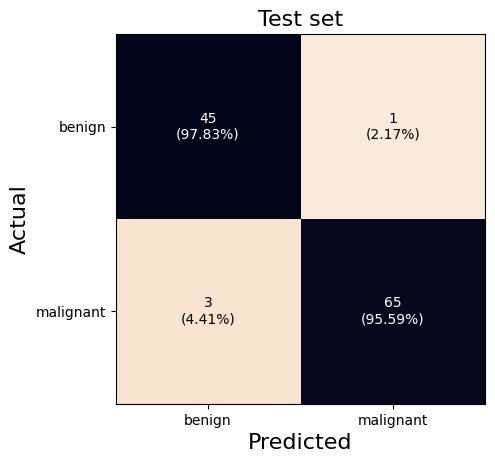

---------------------------------------
AUC validate: 0.8472
AUC test: 0.9671


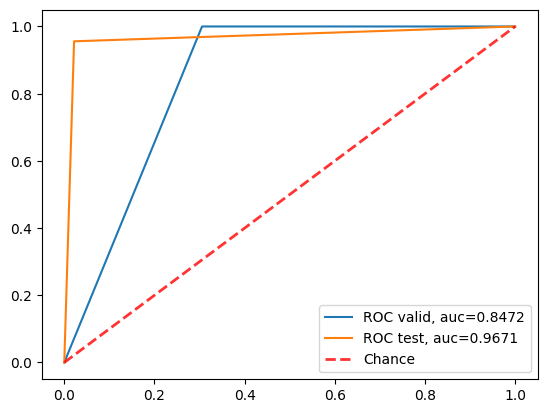

In [170]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split4 = sensitivity(cm_test)
spec_test_split4 = specificity(cm_test)
acc_test_split4 = accuracy(cm_test)
pre_test_split4 = precision(cm_test)
f1_test_split4 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split4 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split4)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split4))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split5

split5
############## validate set ################
Confusion Matrix
----------------
[[45 23]
 [ 0 23]] 

----------------
Sensitivity: 100.00%
Specificity: 66.18%
Accuracy: 74.73%
Precision: 50.00%
Sensitivity: 100.00%
Precision: 50.00%
F1: 66.67%


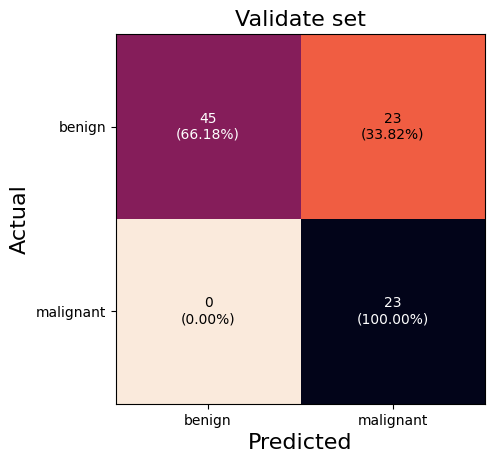

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 5 63]] 

----------------
Sensitivity: 92.65%
Specificity: 100.00%
Accuracy: 95.61%
Precision: 100.00%
Sensitivity: 92.65%
Precision: 100.00%
F1: 96.18%


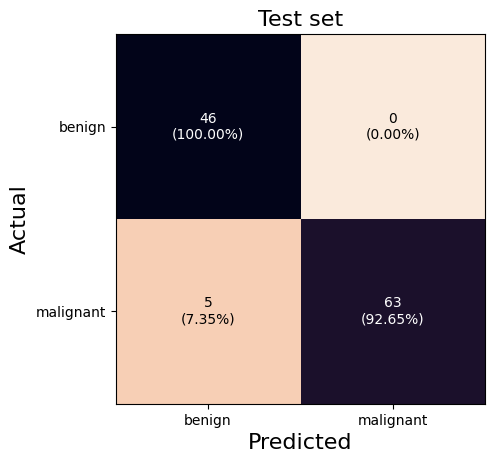

---------------------------------------
AUC validate: 0.8309
AUC test: 0.9632


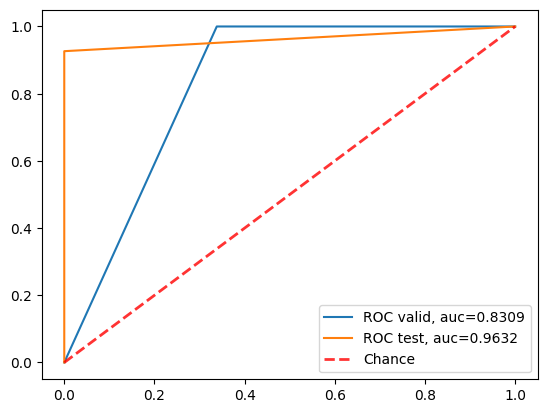

In [188]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split5 = sensitivity(cm_test)
spec_test_split5 = specificity(cm_test)
acc_test_split5 = accuracy(cm_test)
pre_test_split5 = precision(cm_test)
f1_test_split5 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split5 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split5)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### overall

In [192]:
test_split1 = np.array([[45, 1], [8, 60]])
test_split2 = np.array([[45, 1], [7, 61]])
test_split3 = np.array([[45, 1], [4, 64]])
test_split4 = np.array([[45, 1], [3, 65]])
test_split5 = np.array([[46, 0], [5, 63]])

In [193]:
overall_test = test_split1 + test_split2 + test_split3 + test_split4 + test_split5
print(overall_test)

[[226   4]
 [ 27 313]]


Text(0.5, 81.72222222222219, 'Predicted')

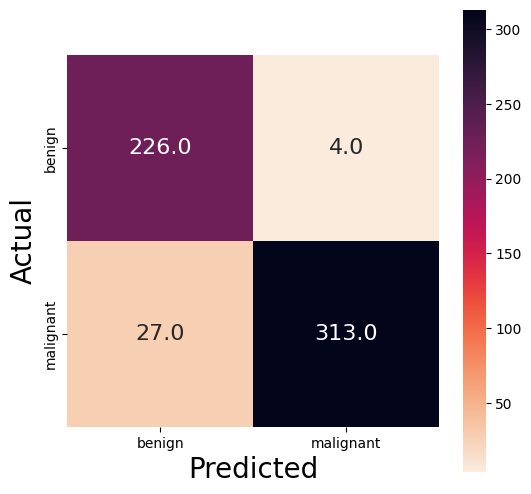

In [194]:
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
# ax = sns.heatmap(cmn, cmap="rocket_r", fmt=".4f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax = sns.heatmap(overall_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [195]:
sensitivity_values = []

sensitivity_values.append(sen_test_split1)
sensitivity_values.append(sen_test_split2)
sensitivity_values.append(sen_test_split3)
sensitivity_values.append(sen_test_split4)
sensitivity_values.append(sen_test_split5)

print(sensitivity_values)

# calculating the mean of sample set
mean_sensitivity = statistics.mean(sensitivity_values)
# Calculate standard deviation of sensitivity
sensitivity_sd = statistics.stdev(sensitivity_values)

print("Mean Sensitivity:", mean_sensitivity)
print("Sensitivity Standard Deviation:", sensitivity_sd)

# Print mean sensitivity with standard deviation
print("Overall Sensitivity: %.2f ± %.2f%%" % (mean_sensitivity, sensitivity_sd))

[88.23529411764706, 89.70588235294117, 94.11764705882352, 95.58823529411765, 92.64705882352942]
Mean Sensitivity: 92.05882352941177
Sensitivity Standard Deviation: 3.049476669607019
Overall Sensitivity: 92.06 ± 3.05%


In [196]:
specificity_values = []

specificity_values.append(spec_test_split1)
specificity_values.append(spec_test_split2)
specificity_values.append(spec_test_split3)
specificity_values.append(spec_test_split4)
specificity_values.append(spec_test_split5)
    
print(specificity_values)

# calculating the mean of sample set
mean_specificity = statistics.mean(specificity_values)
# Calculate standard deviation of sensitivity
specificity_sd = statistics.stdev(specificity_values)

print("Mean Specificity:", mean_specificity)
print("Specificity Standard Deviation:", specificity_sd)

# Print mean specificity with standard deviation
print("Overall Specificity: %.2f ± %.2f%%" % (mean_specificity, specificity_sd))

[97.82608695652173, 97.82608695652173, 97.82608695652173, 97.82608695652173, 100.0]
Mean Specificity: 98.26086956521739
Specificity Standard Deviation: 0.9722034684781714
Overall Specificity: 98.26 ± 0.97%


In [197]:
accuracy_values = []

accuracy_values.append(acc_test_split1)
accuracy_values.append(acc_test_split2)
accuracy_values.append(acc_test_split3)
accuracy_values.append(acc_test_split4)
accuracy_values.append(acc_test_split5)
    
print(accuracy_values)

# calculating the mean of sample set
mean_accuracy = statistics.mean(accuracy_values)
# Calculate standard deviation of sensitivity
accuracy_sd = statistics.stdev(accuracy_values)

print("Mean accuracy:", mean_accuracy)
print("accuracy Standard Deviation:", accuracy_sd)

# Print mean accuracy with standard deviation
print("Overall accuracy: %.2f ± %.2f%%" % (mean_accuracy, accuracy_sd))

[92.10526315789474, 92.98245614035088, 95.6140350877193, 96.49122807017544, 95.6140350877193]
Mean accuracy: 94.56140350877193
accuracy Standard Deviation: 1.9017090691823508
Overall accuracy: 94.56 ± 1.90%


In [198]:
precision_values = []

precision_values.append(pre_test_split1)
precision_values.append(pre_test_split2)
precision_values.append(pre_test_split3)
precision_values.append(pre_test_split4)
precision_values.append(pre_test_split5)
    
print(precision_values)

# calculating the mean of sample set
mean_precision = statistics.mean(precision_values)
# Calculate standard deviation of sensitivity
precision_sd = statistics.stdev(precision_values)

print("Mean precision:", mean_precision)
print("precision Standard Deviation:", precision_sd)

# Print mean specificity with standard deviation
print("Overall precision: %.2f ± %.2f%%" % (mean_precision, precision_sd))

[98.36065573770492, 98.38709677419355, 98.46153846153847, 98.48484848484848, 100.0]
Mean precision: 98.73882789165708
precision Standard Deviation: 0.706873222547268
Overall precision: 98.74 ± 0.71%


In [199]:
f1_values = []

f1_values.append(f1_test_split1)
f1_values.append(f1_test_split2)
f1_values.append(f1_test_split3)
f1_values.append(f1_test_split4)
f1_values.append(f1_test_split5)
    
print(f1_values)

# calculating the mean of sample set
mean_f1 = statistics.mean(f1_values)
# Calculate standard deviation of sensitivity
f1_sd = statistics.stdev(f1_values)

print("Mean f1:", mean_f1)
print("f1 Standard Deviation:", f1_sd)

# Print mean specificity with standard deviation
print("Overall f1: %.2f ± %.2f%%" % (mean_f1, f1_sd))

[93.02325581395348, 93.84615384615385, 96.2406015037594, 97.01492537313433, 96.18320610687023]
Mean f1: 95.26162852877425
f1 Standard Deviation: 1.724501676589279
Overall f1: 95.26 ± 1.72%


In [200]:
auc_values = []

auc_values.append(auc_test_split1)
auc_values.append(auc_test_split2)
auc_values.append(auc_test_split3)
auc_values.append(auc_test_split4)
auc_values.append(auc_test_split5)
    
print(auc_values)

# calculating the mean of sample set
mean_auc = statistics.mean(auc_values)
# Calculate standard deviation of sensitivity
auc_sd = statistics.stdev(auc_values)

print("Mean auc:", mean_auc)
print("auc Standard Deviation:", auc_sd)

# Print mean auc with standard deviation
print("Overall auc: %.2f ± %.2f%%" % (mean_auc, auc_sd))

[0.9303069053708439, 0.9376598465473146, 0.9597186700767263, 0.967071611253197, 0.9632352941176471]
Mean auc: 0.9515984654731457
auc Standard Deviation: 0.01649535823486173
Overall auc: 0.95 ± 0.02%


## Parameter set 2

In [306]:
# Print best parameter and score
print('Best loss parameter:', loss)
print('Best penalty parameter:', penalty)
print('Best learning_rate parameter:', learning_rate)
print('Best eta0 parameter:', eta0)
print('Best max_iter parameter:', max_iter)
print('Best alpha parameter:', alpha)
print('Best score:', grid_search.best_score_)

Best loss parameter: hinge
Best penalty parameter: elasticnet
Best learning_rate parameter: invscaling
Best eta0 parameter: 0.1
Best max_iter parameter: 2000
Best alpha parameter: 0.01
Best score: 0.9783625730994151


In [307]:
# create the individual models
sgd_model = SGDClassifier(loss='hinge', penalty='elasticnet', learning_rate='invscaling', eta0=0.1, max_iter=2000, alpha=0.01)
sgd_model.fit(x_train, y_train)

SGDClassifier(alpha=0.01, eta0=0.1, learning_rate='invscaling', max_iter=2000,
              penalty='elasticnet')

In [85]:
model_path = "../SGD/models/param2/sgd_model_{}.pkl".format(split)

In [309]:
# Save the trained model to disk
joblib.dump(sgd_model, model_path)

['../SGD/models/param2/sgd_model_split5.pkl']

In [86]:
# Load the saved model from disk
sgd_model = joblib.load(model_path)

### split1

split1
############## validate set ################
Confusion Matrix
----------------
[[49  3]
 [ 1 38]] 

----------------
Sensitivity: 97.44%
Specificity: 94.23%
Accuracy: 95.60%
Precision: 92.68%
Sensitivity: 97.44%
Precision: 92.68%
F1: 95.00%


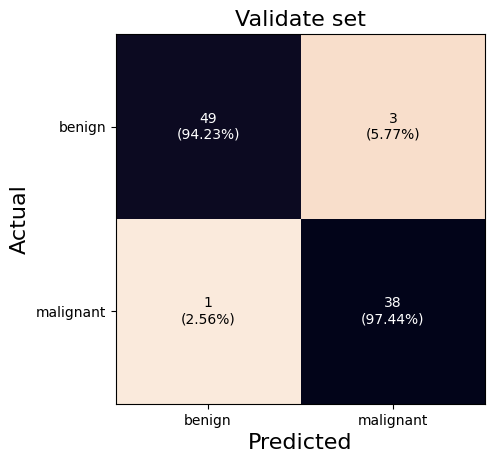

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 3 65]] 

----------------
Sensitivity: 95.59%
Specificity: 100.00%
Accuracy: 97.37%
Precision: 100.00%
Sensitivity: 95.59%
Precision: 100.00%
F1: 97.74%


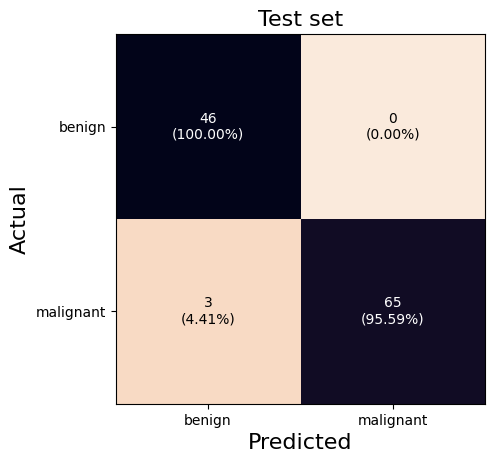

---------------------------------------
AUC validate: 0.9583
AUC test: 0.9779


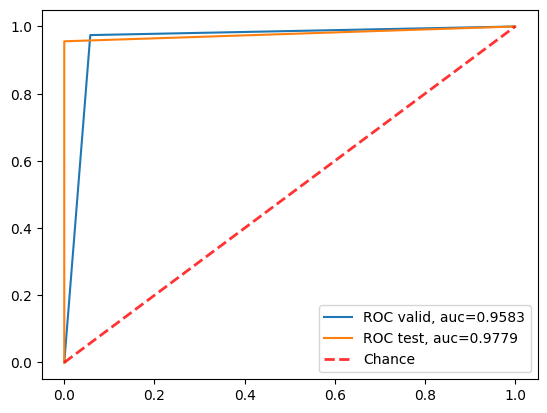

In [31]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split1 = sensitivity(cm_test)
spec_test_split1 = specificity(cm_test)
acc_test_split1 = accuracy(cm_test)
pre_test_split1 = precision(cm_test)
f1_test_split1 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split1 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split1)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split1))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split2

split2
############## validate set ################
Confusion Matrix
----------------
[[51  2]
 [ 2 36]] 

----------------
Sensitivity: 94.74%
Specificity: 96.23%
Accuracy: 95.60%
Precision: 94.74%
Sensitivity: 94.74%
Precision: 94.74%
F1: 94.74%


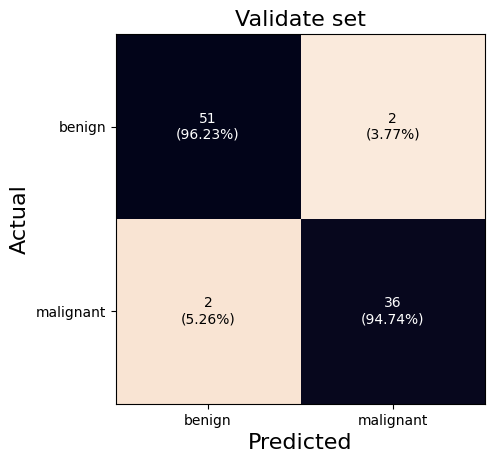

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 6 62]] 

----------------
Sensitivity: 91.18%
Specificity: 100.00%
Accuracy: 94.74%
Precision: 100.00%
Sensitivity: 91.18%
Precision: 100.00%
F1: 95.38%


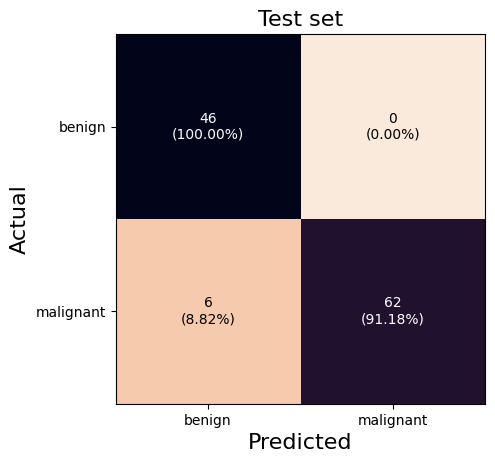

---------------------------------------
AUC validate: 0.9548
AUC test: 0.9559


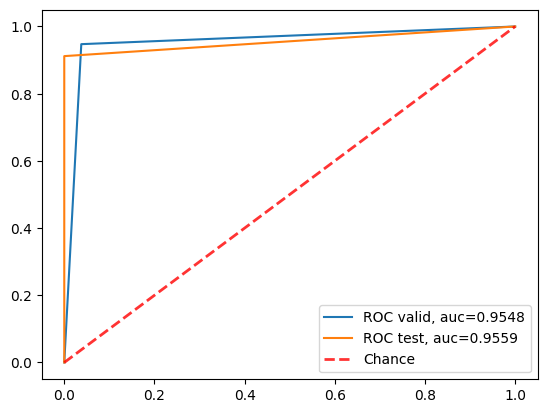

In [45]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split2 = sensitivity(cm_test)
spec_test_split2 = specificity(cm_test)
acc_test_split2 = accuracy(cm_test)
pre_test_split2 = precision(cm_test)
f1_test_split2 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split2 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split2)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split2))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split3

split3
############## validate set ################
Confusion Matrix
----------------
[[58  8]
 [ 1 24]] 

----------------
Sensitivity: 96.00%
Specificity: 87.88%
Accuracy: 90.11%
Precision: 75.00%
Sensitivity: 96.00%
Precision: 75.00%
F1: 84.21%


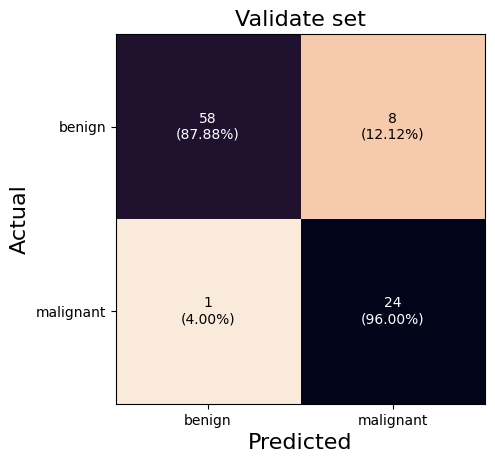

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 5 63]] 

----------------
Sensitivity: 92.65%
Specificity: 100.00%
Accuracy: 95.61%
Precision: 100.00%
Sensitivity: 92.65%
Precision: 100.00%
F1: 96.18%


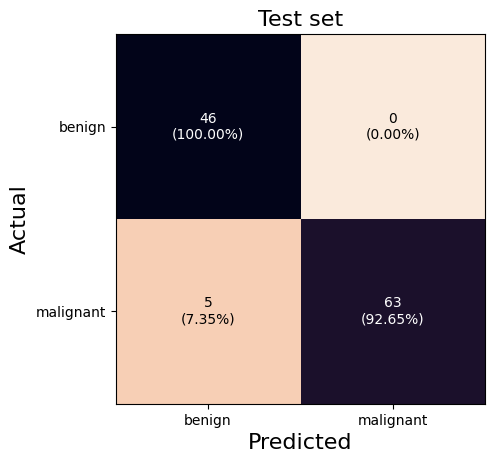

---------------------------------------
AUC validate: 0.9194
AUC test: 0.9632


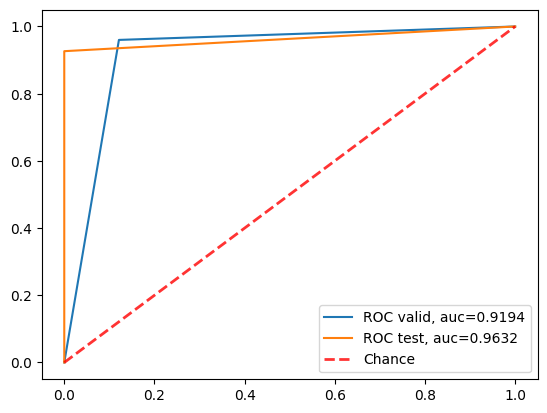

In [59]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()


################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split3 = sensitivity(cm_test)
spec_test_split3 = specificity(cm_test)
acc_test_split3 = accuracy(cm_test)
pre_test_split3 = precision(cm_test)
f1_test_split3 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split3 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split3)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split3))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split4

split4
############## validate set ################
Confusion Matrix
----------------
[[55 17]
 [ 0 19]] 

----------------
Sensitivity: 100.00%
Specificity: 76.39%
Accuracy: 81.32%
Precision: 52.78%
Sensitivity: 100.00%
Precision: 52.78%
F1: 69.09%


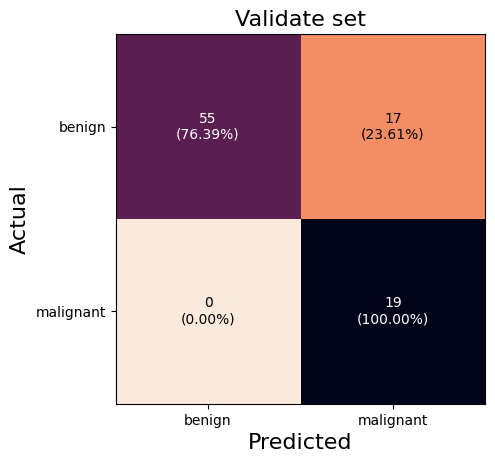

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 4 64]] 

----------------
Sensitivity: 94.12%
Specificity: 100.00%
Accuracy: 96.49%
Precision: 100.00%
Sensitivity: 94.12%
Precision: 100.00%
F1: 96.97%


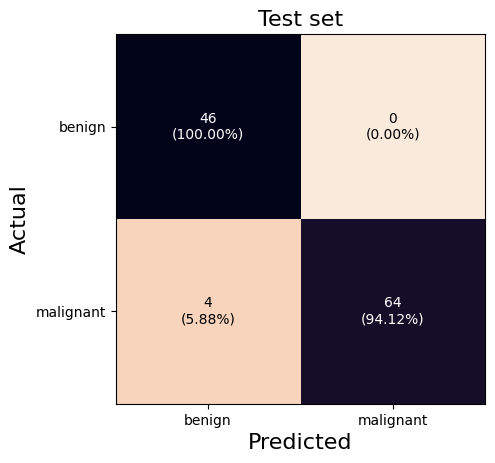

---------------------------------------
AUC validate: 0.8819
AUC test: 0.9706


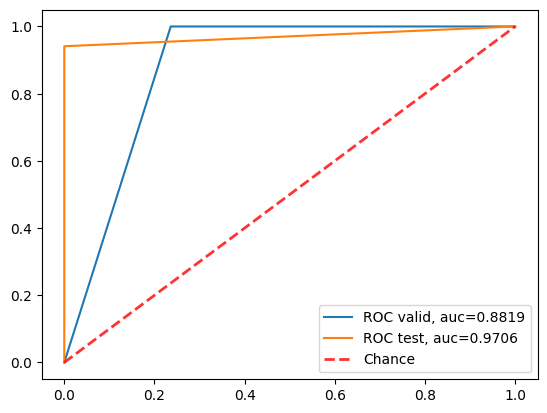

In [73]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()


################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split4 = sensitivity(cm_test)
spec_test_split4 = specificity(cm_test)
acc_test_split4 = accuracy(cm_test)
pre_test_split4 = precision(cm_test)
f1_test_split4 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split4 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split4)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split4))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split5

split5
############## validate set ################
Confusion Matrix
----------------
[[54 14]
 [ 0 23]] 

----------------
Sensitivity: 100.00%
Specificity: 79.41%
Accuracy: 84.62%
Precision: 62.16%
Sensitivity: 100.00%
Precision: 62.16%
F1: 76.67%


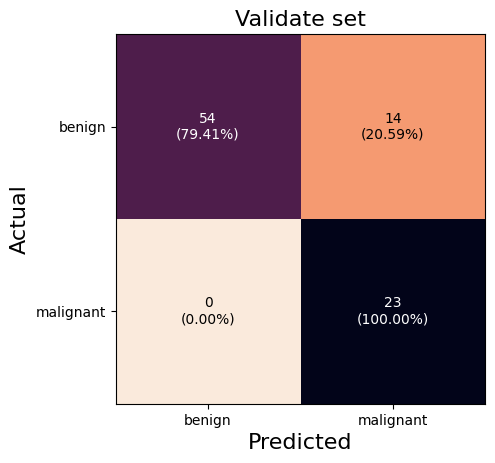

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 3 65]] 

----------------
Sensitivity: 95.59%
Specificity: 100.00%
Accuracy: 97.37%
Precision: 100.00%
Sensitivity: 95.59%
Precision: 100.00%
F1: 97.74%


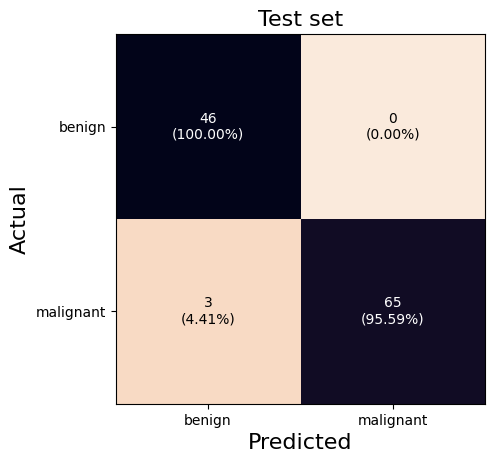

---------------------------------------
AUC validate: 0.8971
AUC test: 0.9779


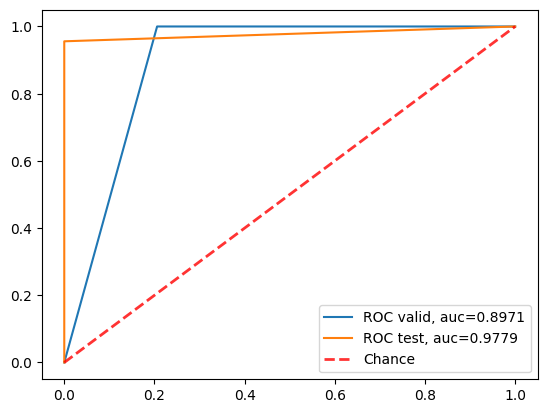

In [87]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()


################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split5 = sensitivity(cm_test)
spec_test_split5 = specificity(cm_test)
acc_test_split5 = accuracy(cm_test)
pre_test_split5 = precision(cm_test)
f1_test_split5 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split5 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split5)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### overall

In [88]:
test_split1 = np.array([[46, 0], [3, 65]])
test_split2 = np.array([[46, 0], [6, 62]])
test_split3 = np.array([[46, 0], [5, 63]])
test_split4 = np.array([[46, 0], [4, 64]])
test_split5 = np.array([[46, 0], [3, 65]])

In [89]:
overall_test = test_split1 + test_split2 + test_split3 + test_split4 + test_split5
print(overall_test)

[[230   0]
 [ 21 319]]


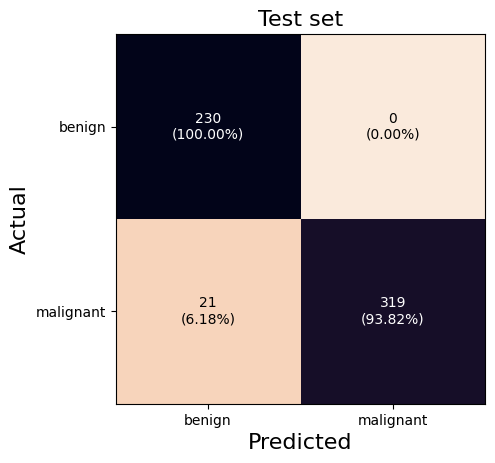

In [95]:
# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = overall_test.astype('float') / overall_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(overall_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

In [315]:
sensitivity_values = []

sensitivity_values.append(sen_test_split1)
sensitivity_values.append(sen_test_split2)
sensitivity_values.append(sen_test_split3)
sensitivity_values.append(sen_test_split4)
sensitivity_values.append(sen_test_split5)

print(sensitivity_values)

# calculating the mean of sample set
mean_sensitivity = statistics.mean(sensitivity_values)
# Calculate standard deviation of sensitivity
sensitivity_sd = statistics.stdev(sensitivity_values)

print("Mean Sensitivity:", mean_sensitivity)
print("Sensitivity Standard Deviation:", sensitivity_sd)

# Print mean sensitivity with standard deviation
print("Overall Sensitivity: %.2f ± %.2f%%" % (mean_sensitivity, sensitivity_sd))

[95.58823529411765, 91.17647058823529, 92.64705882352942, 94.11764705882352, 95.58823529411765]
Mean Sensitivity: 93.82352941176471
Sensitivity Standard Deviation: 1.9174124721184282
Overall Sensitivity: 93.82 ± 1.92%


In [316]:
specificity_values = []

specificity_values.append(spec_test_split1)
specificity_values.append(spec_test_split2)
specificity_values.append(spec_test_split3)
specificity_values.append(spec_test_split4)
specificity_values.append(spec_test_split5)
    
print(specificity_values)

# calculating the mean of sample set
mean_specificity = statistics.mean(specificity_values)
# Calculate standard deviation of sensitivity
specificity_sd = statistics.stdev(specificity_values)

print("Mean Specificity:", mean_specificity)
print("Specificity Standard Deviation:", specificity_sd)

# Print mean specificity with standard deviation
print("Overall Specificity: %.2f ± %.2f%%" % (mean_specificity, specificity_sd))

[100.0, 100.0, 100.0, 100.0, 100.0]
Mean Specificity: 100.0
Specificity Standard Deviation: 0.0
Overall Specificity: 100.00 ± 0.00%


In [317]:
accuracy_values = []

accuracy_values.append(acc_test_split1)
accuracy_values.append(acc_test_split2)
accuracy_values.append(acc_test_split3)
accuracy_values.append(acc_test_split4)
accuracy_values.append(acc_test_split5)
    
print(accuracy_values)

# calculating the mean of sample set
mean_accuracy = statistics.mean(accuracy_values)
# Calculate standard deviation of sensitivity
accuracy_sd = statistics.stdev(accuracy_values)

print("Mean accuracy:", mean_accuracy)
print("accuracy Standard Deviation:", accuracy_sd)

# Print mean accuracy with standard deviation
print("Overall accuracy: %.2f ± %.2f%%" % (mean_accuracy, accuracy_sd))

[97.36842105263158, 94.73684210526315, 95.6140350877193, 96.49122807017544, 97.36842105263158]
Mean accuracy: 96.3157894736842
accuracy Standard Deviation: 1.1437197202109914
Overall accuracy: 96.32 ± 1.14%


In [318]:
precision_values = []

precision_values.append(pre_test_split1)
precision_values.append(pre_test_split2)
precision_values.append(pre_test_split3)
precision_values.append(pre_test_split4)
precision_values.append(pre_test_split5)
    
print(precision_values)

# calculating the mean of sample set
mean_precision = statistics.mean(precision_values)
# Calculate standard deviation of sensitivity
precision_sd = statistics.stdev(precision_values)

print("Mean precision:", mean_precision)
print("precision Standard Deviation:", precision_sd)

# Print mean specificity with standard deviation
print("Overall precision: %.2f ± %.2f%%" % (mean_precision, precision_sd))

[100.0, 100.0, 100.0, 100.0, 100.0]
Mean precision: 100.0
precision Standard Deviation: 0.0
Overall precision: 100.00 ± 0.00%


In [319]:
f1_values = []

f1_values.append(f1_test_split1)
f1_values.append(f1_test_split2)
f1_values.append(f1_test_split3)
f1_values.append(f1_test_split4)
f1_values.append(f1_test_split5)
    
print(f1_values)

# calculating the mean of sample set
mean_f1 = statistics.mean(f1_values)
# Calculate standard deviation of sensitivity
f1_sd = statistics.stdev(f1_values)

print("Mean f1:", mean_f1)
print("f1 Standard Deviation:", f1_sd)

# Print mean specificity with standard deviation
print("Overall f1: %.2f ± %.2f%%" % (mean_f1, f1_sd))

[97.74436090225565, 95.38461538461539, 96.18320610687023, 96.96969696969695, 97.74436090225565]
Mean f1: 96.80524805313877
f1 Standard Deviation: 1.0242122210146967
Overall f1: 96.81 ± 1.02%


In [320]:
auc_values = []

auc_values.append(auc_test_split1)
auc_values.append(auc_test_split2)
auc_values.append(auc_test_split3)
auc_values.append(auc_test_split4)
auc_values.append(auc_test_split5)
    
print(auc_values)

# calculating the mean of sample set
mean_auc = statistics.mean(auc_values)
# Calculate standard deviation of sensitivity
auc_sd = statistics.stdev(auc_values)

print("Mean auc:", mean_auc)
print("auc Standard Deviation:", auc_sd)

# Print mean auc with standard deviation
print("Overall auc: %.2f ± %.2f%%" % (mean_auc, auc_sd))

[0.9779411764705883, 0.9558823529411764, 0.9632352941176471, 0.9705882352941176, 0.9779411764705883]
Mean auc: 0.9691176470588235
auc Standard Deviation: 0.009587062360592185
Overall auc: 0.97 ± 0.01%


## Parameter set 3

In [380]:
# Print best parameter and score
print('Best loss parameter:', loss)
print('Best penalty parameter:', penalty)
print('Best learning_rate parameter:', learning_rate)
print('Best eta0 parameter:', eta0)
print('Best max_iter parameter:', max_iter)
print('Best alpha parameter:', alpha)
print('Best score:', grid_search.best_score_)

Best loss parameter: hinge
Best penalty parameter: elasticnet
Best learning_rate parameter: optimal
Best eta0 parameter: 0.01
Best max_iter parameter: 1000
Best alpha parameter: 0.01
Best score: 0.9894736842105264


In [441]:
# create the individual models
sgd_model = SGDClassifier(loss='hinge', penalty='elasticnet', learning_rate='optimal', eta0=0.01, max_iter=1000, alpha=0.01)
sgd_model.fit(x_train, y_train)

SGDClassifier(alpha=0.01, eta0=0.01, penalty='elasticnet')

In [442]:
model_path = "../SGD/models/param3/sgd_model_{}.pkl".format(split)

In [443]:
# Save the trained model to disk
joblib.dump(sgd_model, model_path)

['../SGD/models/param3/sgd_model_split5.pkl']

In [444]:
# Load the saved model from disk
sgd_model = joblib.load(model_path)

### split1

split1
############## validate set ################
Confusion Matrix
----------------
[[47  5]
 [ 0 39]] 

----------------
Sensitivity: 100.00%
Specificity: 90.38%
Accuracy: 94.51%
Precision: 88.64%
Sensitivity: 100.00%
Precision: 88.64%
F1: 93.98%


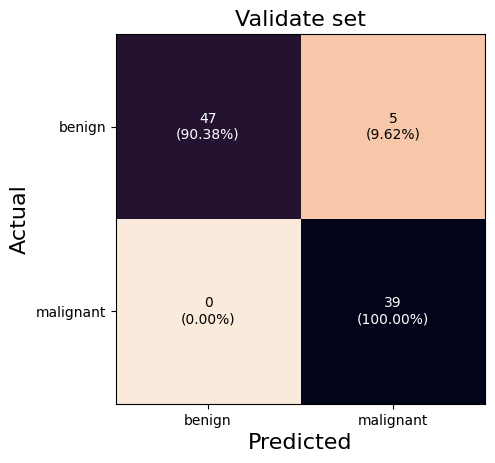

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 6 62]] 

----------------
Sensitivity: 91.18%
Specificity: 97.83%
Accuracy: 93.86%
Precision: 98.41%
Sensitivity: 91.18%
Precision: 98.41%
F1: 94.66%


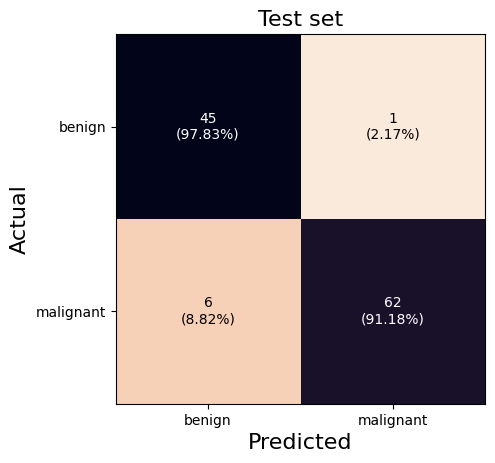

---------------------------------------
AUC validate: 0.9519
AUC test: 0.9450


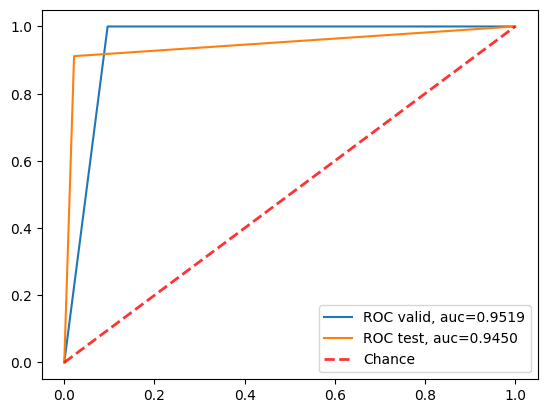

In [368]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split1 = sensitivity(cm_test)
spec_test_split1 = specificity(cm_test)
acc_test_split1 = accuracy(cm_test)
pre_test_split1 = precision(cm_test)
f1_test_split1 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split1 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split1)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split1))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split2

split2
############## validate set ################
Confusion Matrix
----------------
[[50  3]
 [ 1 37]] 

----------------
Sensitivity: 97.37%
Specificity: 94.34%
Accuracy: 95.60%
Precision: 92.50%
Sensitivity: 97.37%
Precision: 92.50%
F1: 94.87%


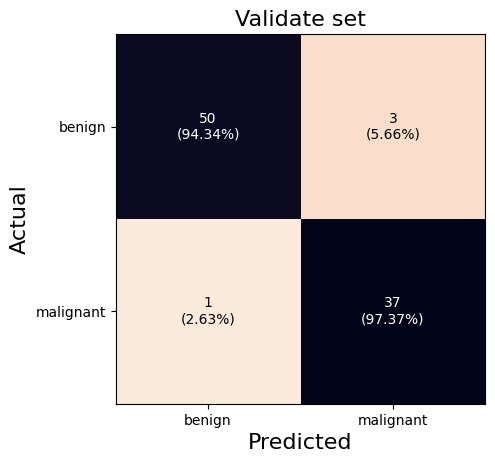

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 6 62]] 

----------------
Sensitivity: 91.18%
Specificity: 100.00%
Accuracy: 94.74%
Precision: 100.00%
Sensitivity: 91.18%
Precision: 100.00%
F1: 95.38%


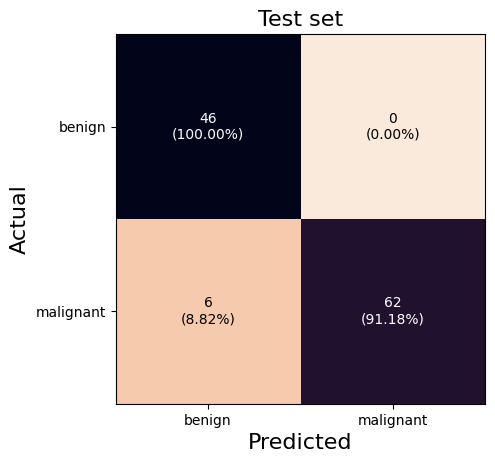

---------------------------------------
AUC validate: 0.9585
AUC test: 0.9559


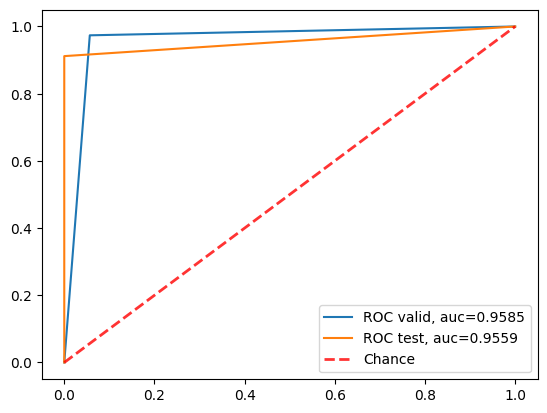

In [385]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split2 = sensitivity(cm_test)
spec_test_split2 = specificity(cm_test)
acc_test_split2 = accuracy(cm_test)
pre_test_split2 = precision(cm_test)
f1_test_split2 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split2 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split2)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split2))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split3

split3
############## validate set ################
Confusion Matrix
----------------
[[55 11]
 [ 1 24]] 

----------------
Sensitivity: 96.00%
Specificity: 83.33%
Accuracy: 86.81%
Precision: 68.57%
Sensitivity: 96.00%
Precision: 68.57%
F1: 80.00%


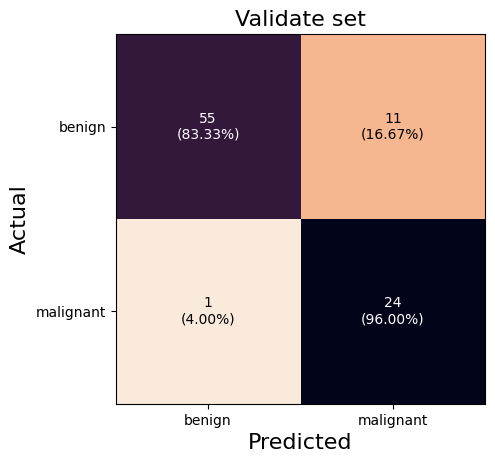

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 3 65]] 

----------------
Sensitivity: 95.59%
Specificity: 100.00%
Accuracy: 97.37%
Precision: 100.00%
Sensitivity: 95.59%
Precision: 100.00%
F1: 97.74%


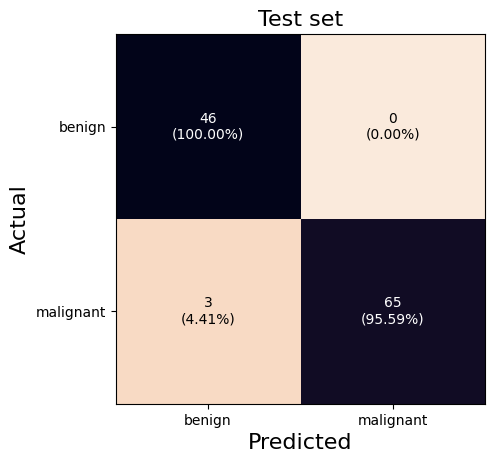

---------------------------------------
AUC validate: 0.8967
AUC test: 0.9779


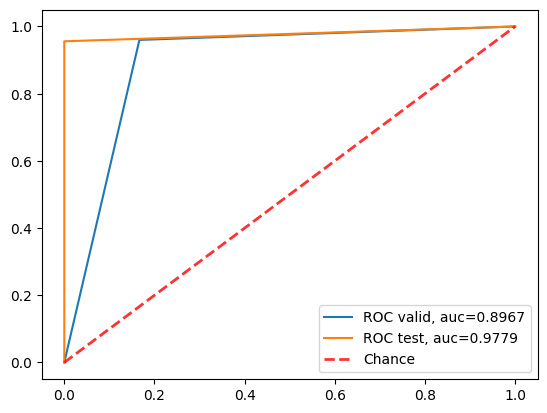

In [351]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split3 = sensitivity(cm_test)
spec_test_split3 = specificity(cm_test)
acc_test_split3 = accuracy(cm_test)
pre_test_split3 = precision(cm_test)
f1_test_split3 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split3 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split3)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split3))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split4

split4
############## validate set ################
Confusion Matrix
----------------
[[50 22]
 [ 0 19]] 

----------------
Sensitivity: 100.00%
Specificity: 69.44%
Accuracy: 75.82%
Precision: 46.34%
Sensitivity: 100.00%
Precision: 46.34%
F1: 63.33%


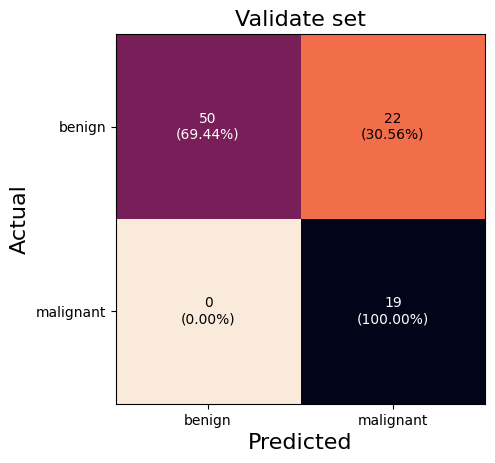

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 3 65]] 

----------------
Sensitivity: 95.59%
Specificity: 100.00%
Accuracy: 97.37%
Precision: 100.00%
Sensitivity: 95.59%
Precision: 100.00%
F1: 97.74%


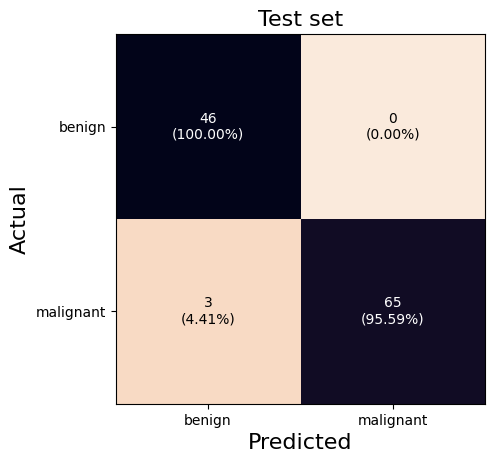

---------------------------------------
AUC validate: 0.8472
AUC test: 0.9779


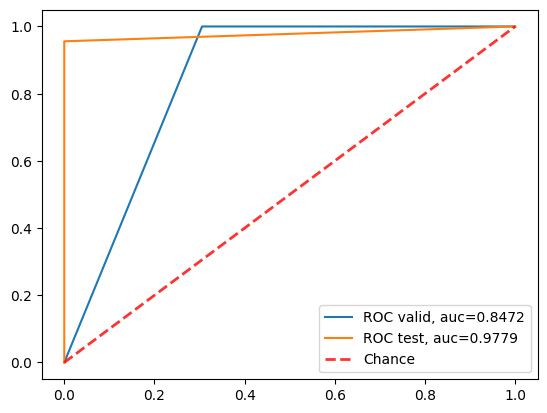

In [417]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split4 = sensitivity(cm_test)
spec_test_split4 = specificity(cm_test)
acc_test_split4 = accuracy(cm_test)
pre_test_split4 = precision(cm_test)
f1_test_split4 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split4 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split4)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split4))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split5

split5
############## validate set ################
Confusion Matrix
----------------
[[49 19]
 [ 0 23]] 

----------------
Sensitivity: 100.00%
Specificity: 72.06%
Accuracy: 79.12%
Precision: 54.76%
Sensitivity: 100.00%
Precision: 54.76%
F1: 70.77%


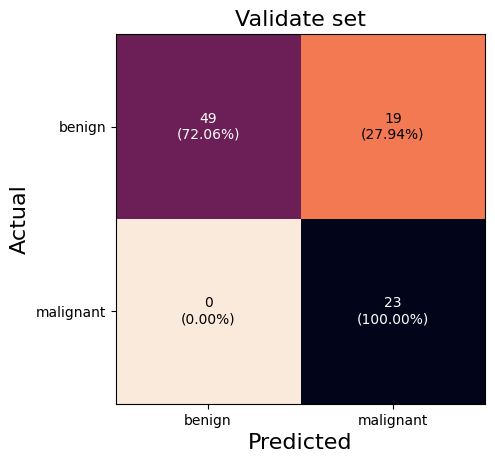

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 4 64]] 

----------------
Sensitivity: 94.12%
Specificity: 100.00%
Accuracy: 96.49%
Precision: 100.00%
Sensitivity: 94.12%
Precision: 100.00%
F1: 96.97%


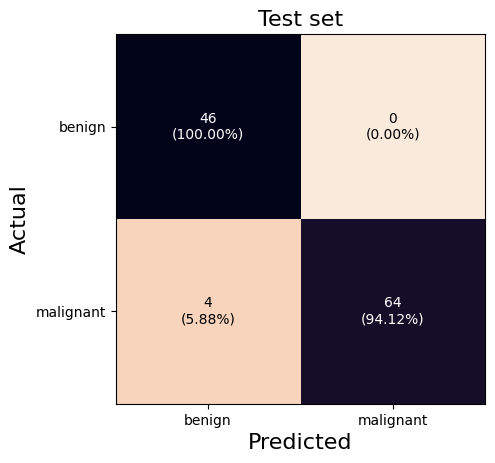

---------------------------------------
AUC validate: 0.8603
AUC test: 0.9706


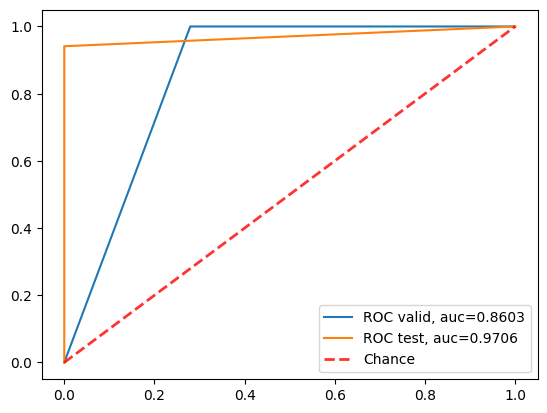

In [445]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split5 = sensitivity(cm_test)
spec_test_split5 = specificity(cm_test)
acc_test_split5 = accuracy(cm_test)
pre_test_split5 = precision(cm_test)
f1_test_split5 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split5 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split5)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### overall

In [446]:
test_split1 = np.array([[45, 1], [6, 62]])
test_split2 = np.array([[46, 0], [6, 62]])
test_split3 = np.array([[46, 0], [3, 65]])
test_split4 = np.array([[46, 0], [3, 65]])
test_split5 = np.array([[46, 0], [4, 64]])

In [447]:
overall_test = test_split1 + test_split2 + test_split3 + test_split4 + test_split5
print(overall_test)

[[229   1]
 [ 22 318]]


Text(0.5, 81.72222222222219, 'Predicted')

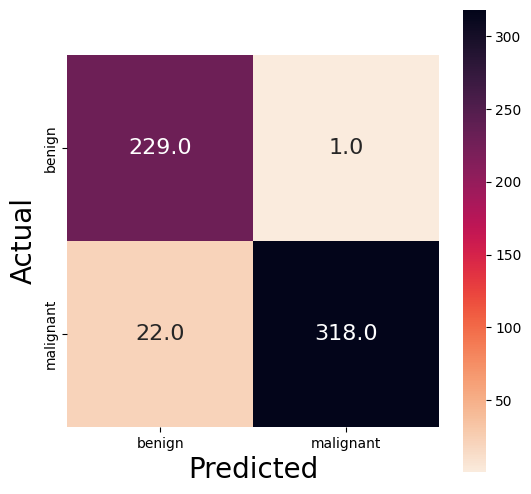

In [448]:
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
# ax = sns.heatmap(cmn, cmap="rocket_r", fmt=".4f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax = sns.heatmap(overall_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [449]:
sensitivity_values = []

sensitivity_values.append(sen_test_split1)
sensitivity_values.append(sen_test_split2)
sensitivity_values.append(sen_test_split3)
sensitivity_values.append(sen_test_split4)
sensitivity_values.append(sen_test_split5)

print(sensitivity_values)

# calculating the mean of sample set
mean_sensitivity = statistics.mean(sensitivity_values)
# Calculate standard deviation of sensitivity
sensitivity_sd = statistics.stdev(sensitivity_values)

print("Mean Sensitivity:", mean_sensitivity)
print("Sensitivity Standard Deviation:", sensitivity_sd)

# Print mean sensitivity with standard deviation
print("Overall Sensitivity: %.2f ± %.2f%%" % (mean_sensitivity, sensitivity_sd))

[91.17647058823529, 91.17647058823529, 95.58823529411765, 95.58823529411765, 94.11764705882352]
Mean Sensitivity: 93.52941176470588
Sensitivity Standard Deviation: 2.2302574835445776
Overall Sensitivity: 93.53 ± 2.23%


In [450]:
specificity_values = []

specificity_values.append(spec_test_split1)
specificity_values.append(spec_test_split2)
specificity_values.append(spec_test_split3)
specificity_values.append(spec_test_split4)
specificity_values.append(spec_test_split5)
    
print(specificity_values)

# calculating the mean of sample set
mean_specificity = statistics.mean(specificity_values)
# Calculate standard deviation of sensitivity
specificity_sd = statistics.stdev(specificity_values)

print("Mean Specificity:", mean_specificity)
print("Specificity Standard Deviation:", specificity_sd)

# Print mean specificity with standard deviation
print("Overall Specificity: %.2f ± %.2f%%" % (mean_specificity, specificity_sd))

[97.82608695652173, 100.0, 100.0, 100.0, 100.0]
Mean Specificity: 99.56521739130434
Specificity Standard Deviation: 0.9722034684781714
Overall Specificity: 99.57 ± 0.97%


In [451]:
accuracy_values = []

accuracy_values.append(acc_test_split1)
accuracy_values.append(acc_test_split2)
accuracy_values.append(acc_test_split3)
accuracy_values.append(acc_test_split4)
accuracy_values.append(acc_test_split5)
    
print(accuracy_values)

# calculating the mean of sample set
mean_accuracy = statistics.mean(accuracy_values)
# Calculate standard deviation of sensitivity
accuracy_sd = statistics.stdev(accuracy_values)

print("Mean accuracy:", mean_accuracy)
print("accuracy Standard Deviation:", accuracy_sd)

# Print mean accuracy with standard deviation
print("Overall accuracy: %.2f ± %.2f%%" % (mean_accuracy, accuracy_sd))

[93.85964912280701, 94.73684210526315, 97.36842105263158, 97.36842105263158, 96.49122807017544]
Mean accuracy: 95.96491228070175
accuracy Standard Deviation: 1.593500186367102
Overall accuracy: 95.96 ± 1.59%


In [452]:
precision_values = []

precision_values.append(pre_test_split1)
precision_values.append(pre_test_split2)
precision_values.append(pre_test_split3)
precision_values.append(pre_test_split4)
precision_values.append(pre_test_split5)
    
print(precision_values)

# calculating the mean of sample set
mean_precision = statistics.mean(precision_values)
# Calculate standard deviation of sensitivity
precision_sd = statistics.stdev(precision_values)

print("Mean precision:", mean_precision)
print("precision Standard Deviation:", precision_sd)

# Print mean specificity with standard deviation
print("Overall precision: %.2f ± %.2f%%" % (mean_precision, precision_sd))

[98.4126984126984, 100.0, 100.0, 100.0, 100.0]
Mean precision: 99.68253968253968
precision Standard Deviation: 0.7098628499999371
Overall precision: 99.68 ± 0.71%


In [453]:
f1_values = []

f1_values.append(f1_test_split1)
f1_values.append(f1_test_split2)
f1_values.append(f1_test_split3)
f1_values.append(f1_test_split4)
f1_values.append(f1_test_split5)
    
print(f1_values)

# calculating the mean of sample set
mean_f1 = statistics.mean(f1_values)
# Calculate standard deviation of sensitivity
f1_sd = statistics.stdev(f1_values)

print("Mean f1:", mean_f1)
print("f1 Standard Deviation:", f1_sd)

# Print mean specificity with standard deviation
print("Overall f1: %.2f ± %.2f%%" % (mean_f1, f1_sd))

[94.65648854961832, 95.38461538461539, 97.74436090225565, 97.74436090225565, 96.96969696969695]
Mean f1: 96.4999045416884
f1 Standard Deviation: 1.4106825135223646
Overall f1: 96.50 ± 1.41%


In [454]:
auc_values = []

auc_values.append(auc_test_split1)
auc_values.append(auc_test_split2)
auc_values.append(auc_test_split3)
auc_values.append(auc_test_split4)
auc_values.append(auc_test_split5)
    
print(auc_values)

# calculating the mean of sample set
mean_auc = statistics.mean(auc_values)
# Calculate standard deviation of sensitivity
auc_sd = statistics.stdev(auc_values)

print("Mean auc:", mean_auc)
print("auc Standard Deviation:", auc_sd)

# Print mean auc with standard deviation
print("Overall auc: %.2f ± %.2f%%" % (mean_auc, auc_sd))

[0.9450127877237852, 0.9558823529411764, 0.9779411764705883, 0.9779411764705883, 0.9705882352941176]
Mean auc: 0.9654731457800512
auc Standard Deviation: 0.014557448938654101
Overall auc: 0.97 ± 0.01%


## Parameter set 4

In [535]:
# Print best parameter and score
print('Best loss parameter:', loss)
print('Best penalty parameter:', penalty)
print('Best learning_rate parameter:', learning_rate)
print('Best eta0 parameter:', eta0)
print('Best max_iter parameter:', max_iter)
print('Best alpha parameter:', alpha)
print('Best score:', grid_search.best_score_)

Best loss parameter: hinge
Best penalty parameter: l2
Best learning_rate parameter: invscaling
Best eta0 parameter: 1.0
Best max_iter parameter: 5000
Best alpha parameter: 1e-06
Best score: 1.0


In [536]:
# create the individual models
sgd_model = SGDClassifier(loss='hinge', penalty='l2', learning_rate='invscaling', eta0=1.0, max_iter=5000, alpha=1e-06)
sgd_model.fit(x_train, y_train)

SGDClassifier(alpha=1e-06, eta0=1.0, learning_rate='invscaling', max_iter=5000)

In [537]:
model_path = "../SGD/models/param4/sgd_model_{}.pkl".format(split)

In [538]:
# Save the trained model to disk
joblib.dump(sgd_model, model_path)

['../SGD/models/param4/sgd_model_split5.pkl']

In [539]:
# Load the saved model from disk
sgd_model = joblib.load(model_path)

### split1

split1
############## validate set ################
Confusion Matrix
----------------
[[46  6]
 [ 1 38]] 

----------------
Sensitivity: 97.44%
Specificity: 88.46%
Accuracy: 92.31%
Precision: 86.36%
Sensitivity: 97.44%
Precision: 86.36%
F1: 91.57%


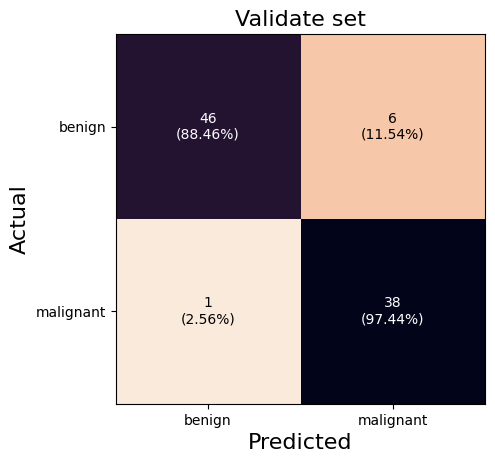

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 7 61]] 

----------------
Sensitivity: 89.71%
Specificity: 97.83%
Accuracy: 92.98%
Precision: 98.39%
Sensitivity: 89.71%
Precision: 98.39%
F1: 93.85%


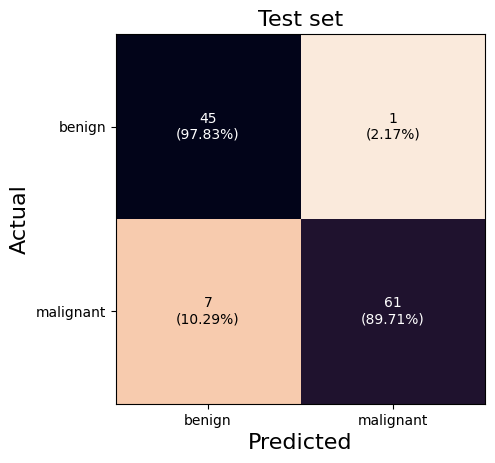

---------------------------------------
AUC validate: 0.9295
AUC test: 0.9377


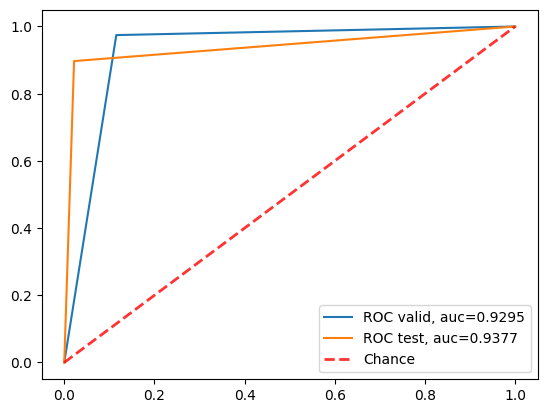

In [489]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split1 = sensitivity(cm_test)
spec_test_split1 = specificity(cm_test)
acc_test_split1 = accuracy(cm_test)
pre_test_split1 = precision(cm_test)
f1_test_split1 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split1 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split1)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split1))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split2

split2
############## validate set ################
Confusion Matrix
----------------
[[50  3]
 [ 2 36]] 

----------------
Sensitivity: 94.74%
Specificity: 94.34%
Accuracy: 94.51%
Precision: 92.31%
Sensitivity: 94.74%
Precision: 92.31%
F1: 93.51%


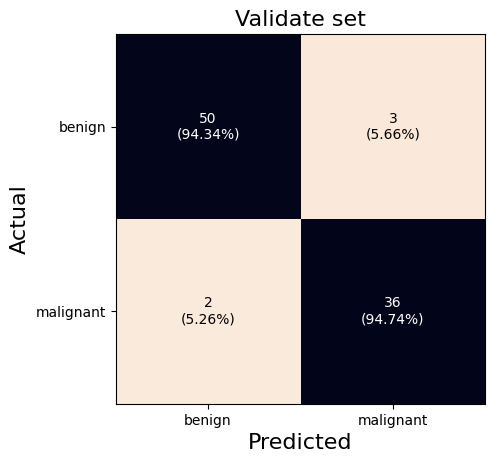

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 7 61]] 

----------------
Sensitivity: 89.71%
Specificity: 100.00%
Accuracy: 93.86%
Precision: 100.00%
Sensitivity: 89.71%
Precision: 100.00%
F1: 94.57%


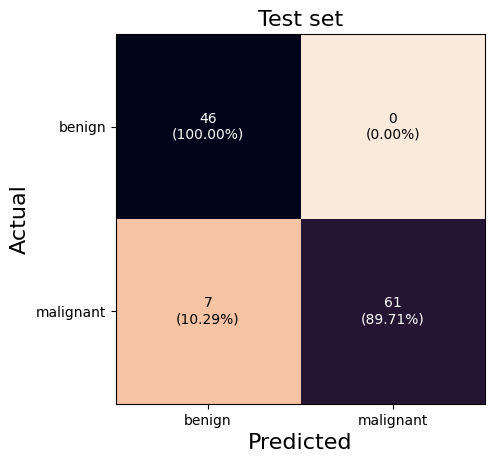

---------------------------------------
AUC validate: 0.9454
AUC test: 0.9485


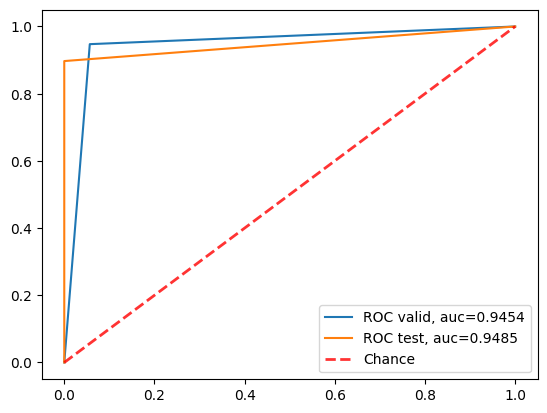

In [506]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split2 = sensitivity(cm_test)
spec_test_split2 = specificity(cm_test)
acc_test_split2 = accuracy(cm_test)
pre_test_split2 = precision(cm_test)
f1_test_split2 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split2 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split2)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split2))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split3

split3
############## validate set ################
Confusion Matrix
----------------
[[57  9]
 [ 1 24]] 

----------------
Sensitivity: 96.00%
Specificity: 86.36%
Accuracy: 89.01%
Precision: 72.73%
Sensitivity: 96.00%
Precision: 72.73%
F1: 82.76%


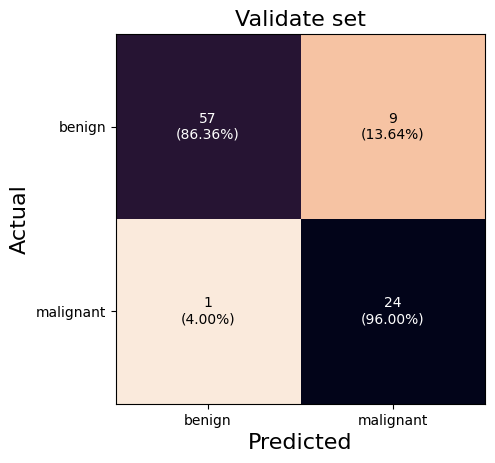

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 4 64]] 

----------------
Sensitivity: 94.12%
Specificity: 100.00%
Accuracy: 96.49%
Precision: 100.00%
Sensitivity: 94.12%
Precision: 100.00%
F1: 96.97%


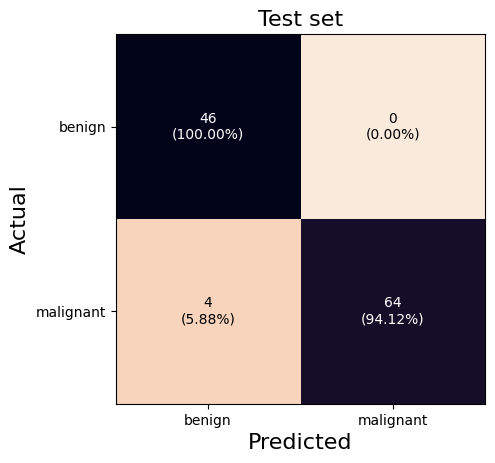

---------------------------------------
AUC validate: 0.9118
AUC test: 0.9706


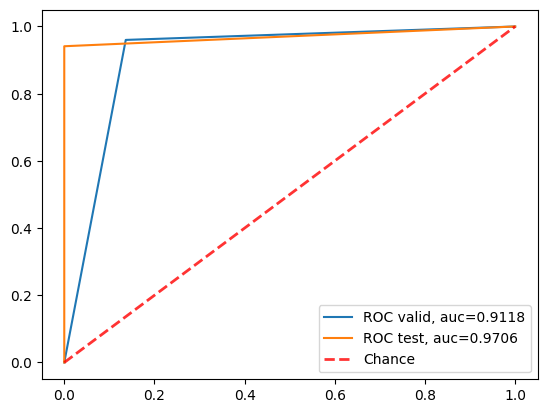

In [523]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split3 = sensitivity(cm_test)
spec_test_split3 = specificity(cm_test)
acc_test_split3 = accuracy(cm_test)
pre_test_split3 = precision(cm_test)
f1_test_split3 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split3 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split3)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split3))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split4

split4
############## validate set ################
Confusion Matrix
----------------
[[54 18]
 [ 0 19]] 

----------------
Sensitivity: 100.00%
Specificity: 75.00%
Accuracy: 80.22%
Precision: 51.35%
Sensitivity: 100.00%
Precision: 51.35%
F1: 67.86%


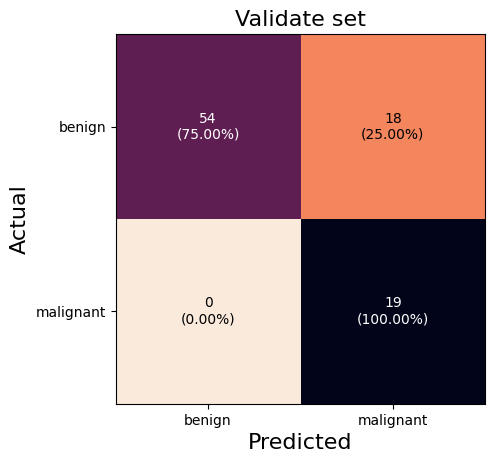

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 3 65]] 

----------------
Sensitivity: 95.59%
Specificity: 97.83%
Accuracy: 96.49%
Precision: 98.48%
Sensitivity: 95.59%
Precision: 98.48%
F1: 97.01%


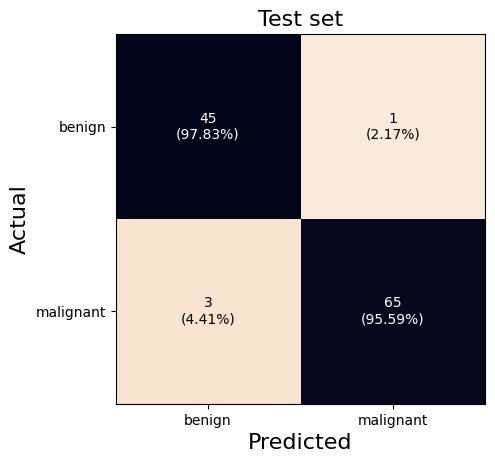

---------------------------------------
AUC validate: 0.8750
AUC test: 0.9671


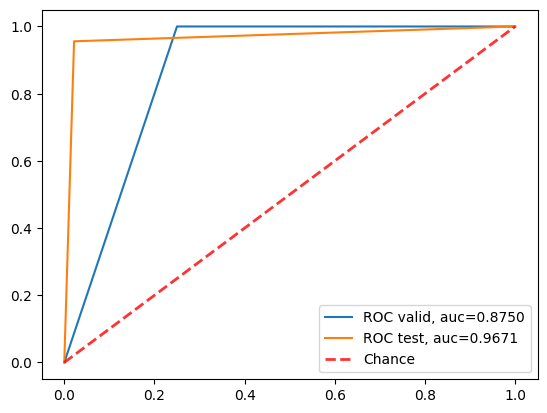

In [472]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split4 = sensitivity(cm_test)
spec_test_split4 = specificity(cm_test)
acc_test_split4 = accuracy(cm_test)
pre_test_split4 = precision(cm_test)
f1_test_split4 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split4 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split4)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split4))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split5

split5
############## validate set ################
Confusion Matrix
----------------
[[45 23]
 [ 0 23]] 

----------------
Sensitivity: 100.00%
Specificity: 66.18%
Accuracy: 74.73%
Precision: 50.00%
Sensitivity: 100.00%
Precision: 50.00%
F1: 66.67%


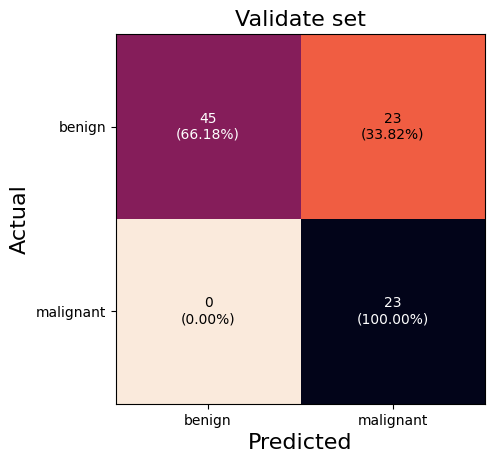

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 2 66]] 

----------------
Sensitivity: 97.06%
Specificity: 100.00%
Accuracy: 98.25%
Precision: 100.00%
Sensitivity: 97.06%
Precision: 100.00%
F1: 98.51%


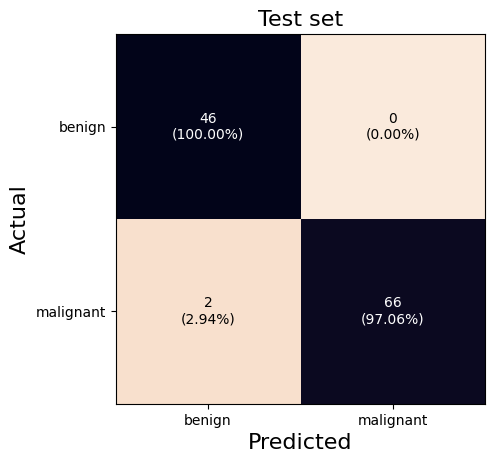

---------------------------------------
AUC validate: 0.8309
AUC test: 0.9853


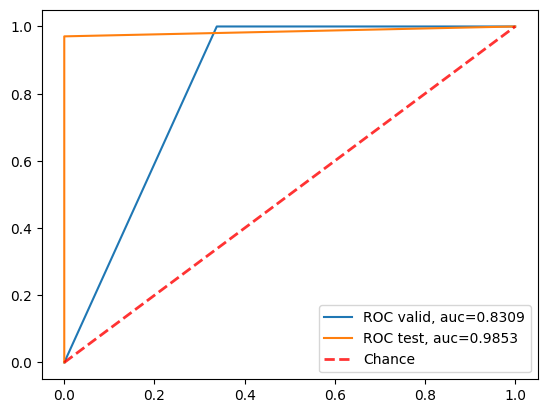

In [540]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split5 = sensitivity(cm_test)
spec_test_split5 = specificity(cm_test)
acc_test_split5 = accuracy(cm_test)
pre_test_split5 = precision(cm_test)
f1_test_split5 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split5 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split5)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### overall

In [541]:
test_split1 = np.array([[45, 1], [7, 61]])
test_split2 = np.array([[46, 0], [7, 61]])
test_split3 = np.array([[46, 0], [4, 64]])
test_split4 = np.array([[45, 1], [3, 65]])
test_split5 = np.array([[46, 0], [2, 66]])

In [542]:
overall_test = test_split1 + test_split2 + test_split3 + test_split4 + test_split5
print(overall_test)

[[228   2]
 [ 23 317]]


Text(0.5, 81.72222222222219, 'Predicted')

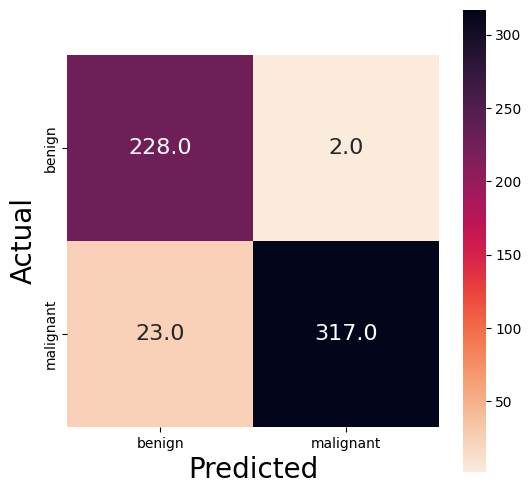

In [543]:
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
# ax = sns.heatmap(cmn, cmap="rocket_r", fmt=".4f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax = sns.heatmap(overall_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [544]:
sensitivity_values = []

sensitivity_values.append(sen_test_split1)
sensitivity_values.append(sen_test_split2)
sensitivity_values.append(sen_test_split3)
sensitivity_values.append(sen_test_split4)
sensitivity_values.append(sen_test_split5)

print(sensitivity_values)

# calculating the mean of sample set
mean_sensitivity = statistics.mean(sensitivity_values)
# Calculate standard deviation of sensitivity
sensitivity_sd = statistics.stdev(sensitivity_values)

print("Mean Sensitivity:", mean_sensitivity)
print("Sensitivity Standard Deviation:", sensitivity_sd)

# Print mean sensitivity with standard deviation
print("Overall Sensitivity: %.2f ± %.2f%%" % (mean_sensitivity, sensitivity_sd))

[89.70588235294117, 89.70588235294117, 94.11764705882352, 95.58823529411765, 97.05882352941177]
Mean Sensitivity: 93.23529411764706
Sensitivity Standard Deviation: 3.3855483627121608
Overall Sensitivity: 93.24 ± 3.39%


In [545]:
specificity_values = []

specificity_values.append(spec_test_split1)
specificity_values.append(spec_test_split2)
specificity_values.append(spec_test_split3)
specificity_values.append(spec_test_split4)
specificity_values.append(spec_test_split5)
    
print(specificity_values)

# calculating the mean of sample set
mean_specificity = statistics.mean(specificity_values)
# Calculate standard deviation of sensitivity
specificity_sd = statistics.stdev(specificity_values)

print("Mean Specificity:", mean_specificity)
print("Specificity Standard Deviation:", specificity_sd)

# Print mean specificity with standard deviation
print("Overall Specificity: %.2f ± %.2f%%" % (mean_specificity, specificity_sd))

[97.82608695652173, 100.0, 100.0, 97.82608695652173, 100.0]
Mean Specificity: 99.13043478260869
Specificity Standard Deviation: 1.1907012119677547
Overall Specificity: 99.13 ± 1.19%


In [546]:
accuracy_values = []

accuracy_values.append(acc_test_split1)
accuracy_values.append(acc_test_split2)
accuracy_values.append(acc_test_split3)
accuracy_values.append(acc_test_split4)
accuracy_values.append(acc_test_split5)
    
print(accuracy_values)

# calculating the mean of sample set
mean_accuracy = statistics.mean(accuracy_values)
# Calculate standard deviation of sensitivity
accuracy_sd = statistics.stdev(accuracy_values)

print("Mean accuracy:", mean_accuracy)
print("accuracy Standard Deviation:", accuracy_sd)

# Print mean accuracy with standard deviation
print("Overall accuracy: %.2f ± %.2f%%" % (mean_accuracy, accuracy_sd))

[92.98245614035088, 93.85964912280701, 96.49122807017544, 96.49122807017544, 98.24561403508771]
Mean accuracy: 95.6140350877193
accuracy Standard Deviation: 2.148675212967699
Overall accuracy: 95.61 ± 2.15%


In [547]:
precision_values = []

precision_values.append(pre_test_split1)
precision_values.append(pre_test_split2)
precision_values.append(pre_test_split3)
precision_values.append(pre_test_split4)
precision_values.append(pre_test_split5)
    
print(precision_values)

# calculating the mean of sample set
mean_precision = statistics.mean(precision_values)
# Calculate standard deviation of sensitivity
precision_sd = statistics.stdev(precision_values)

print("Mean precision:", mean_precision)
print("precision Standard Deviation:", precision_sd)

# Print mean specificity with standard deviation
print("Overall precision: %.2f ± %.2f%%" % (mean_precision, precision_sd))

[98.38709677419355, 100.0, 100.0, 98.48484848484848, 100.0]
Mean precision: 99.37438905180841
precision Standard Deviation: 0.8573499339821608
Overall precision: 99.37 ± 0.86%


In [548]:
f1_values = []

f1_values.append(f1_test_split1)
f1_values.append(f1_test_split2)
f1_values.append(f1_test_split3)
f1_values.append(f1_test_split4)
f1_values.append(f1_test_split5)
    
print(f1_values)

# calculating the mean of sample set
mean_f1 = statistics.mean(f1_values)
# Calculate standard deviation of sensitivity
f1_sd = statistics.stdev(f1_values)

print("Mean f1:", mean_f1)
print("f1 Standard Deviation:", f1_sd)

# Print mean specificity with standard deviation
print("Overall f1: %.2f ± %.2f%%" % (mean_f1, f1_sd))

[93.84615384615385, 94.57364341085271, 96.96969696969695, 97.01492537313433, 98.50746268656717]
Mean f1: 96.18237645728101
f1 Standard Deviation: 1.9212623040326786
Overall f1: 96.18 ± 1.92%


In [549]:
auc_values = []

auc_values.append(auc_test_split1)
auc_values.append(auc_test_split2)
auc_values.append(auc_test_split3)
auc_values.append(auc_test_split4)
auc_values.append(auc_test_split5)
    
print(auc_values)

# calculating the mean of sample set
mean_auc = statistics.mean(auc_values)
# Calculate standard deviation of sensitivity
auc_sd = statistics.stdev(auc_values)

print("Mean auc:", mean_auc)
print("auc Standard Deviation:", auc_sd)

# Print mean auc with standard deviation
print("Overall auc: %.2f ± %.2f%%" % (mean_auc, auc_sd))

[0.9376598465473146, 0.9485294117647058, 0.9705882352941176, 0.967071611253197, 0.9852941176470589]
Mean auc: 0.9618286445012788
auc Standard Deviation: 0.018813877505023453
Overall auc: 0.96 ± 0.02%


## Parameter set 5

In [630]:
# Print best parameter and score
print('Best loss parameter:', loss)
print('Best penalty parameter:', penalty)
print('Best learning_rate parameter:', learning_rate)
print('Best eta0 parameter:', eta0)
print('Best max_iter parameter:', max_iter)
print('Best alpha parameter:', alpha)
print('Best score:', grid_search.best_score_)

Best loss parameter: log_loss
Best penalty parameter: l1
Best learning_rate parameter: optimal
Best eta0 parameter: 1.0
Best max_iter parameter: 1000
Best alpha parameter: 0.001
Best score: 1.0


In [631]:
# create the individual models
sgd_model = SGDClassifier(loss='log_loss', penalty='l1', learning_rate='optimal', eta0=1.0, max_iter=1000, alpha=0.001)
sgd_model.fit(x_train, y_train)

SGDClassifier(alpha=0.001, eta0=1.0, loss='log_loss', penalty='l1')

In [632]:
model_path = "../SGD/models/param5/sgd_model_{}.pkl".format(split)

In [633]:
# Save the trained model to disk
joblib.dump(sgd_model, model_path)

['../SGD/models/param5/sgd_model_split4.pkl']

In [634]:
# Load the saved model from disk
sgd_model = joblib.load(model_path)

### split1

split1
############## validate set ################
Confusion Matrix
----------------
[[44  8]
 [ 0 39]] 

----------------
Sensitivity: 100.00%
Specificity: 84.62%
Accuracy: 91.21%
Precision: 82.98%
Sensitivity: 100.00%
Precision: 82.98%
F1: 90.70%


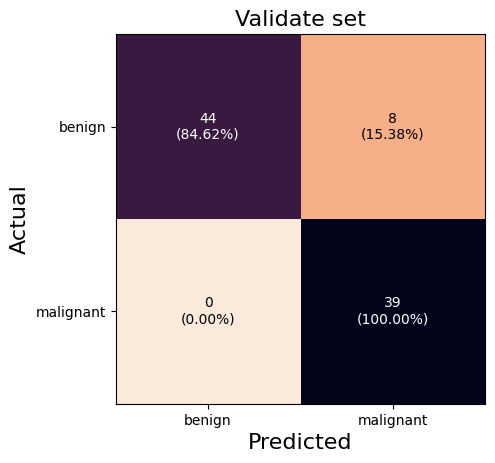

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 4 64]] 

----------------
Sensitivity: 94.12%
Specificity: 97.83%
Accuracy: 95.61%
Precision: 98.46%
Sensitivity: 94.12%
Precision: 98.46%
F1: 96.24%


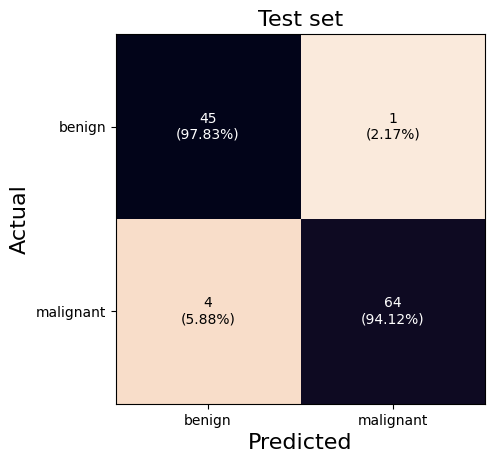

---------------------------------------
AUC validate: 0.9231
AUC test: 0.9597


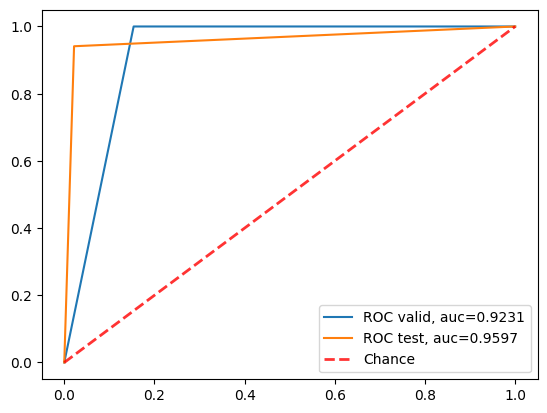

In [584]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split1 = sensitivity(cm_test)
spec_test_split1 = specificity(cm_test)
acc_test_split1 = accuracy(cm_test)
pre_test_split1 = precision(cm_test)
f1_test_split1 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split1 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split1)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split1))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split2

split2
############## validate set ################
Confusion Matrix
----------------
[[47  6]
 [ 1 37]] 

----------------
Sensitivity: 97.37%
Specificity: 88.68%
Accuracy: 92.31%
Precision: 86.05%
Sensitivity: 97.37%
Precision: 86.05%
F1: 91.36%


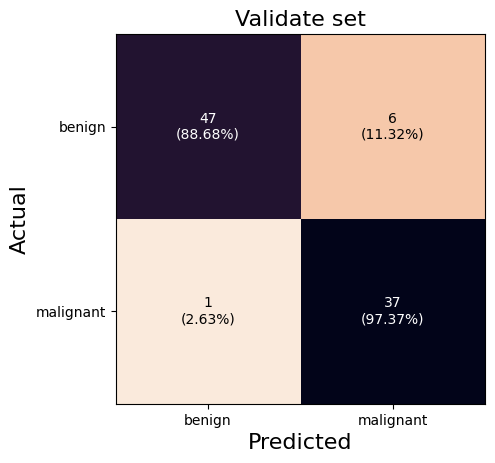

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 5 63]] 

----------------
Sensitivity: 92.65%
Specificity: 100.00%
Accuracy: 95.61%
Precision: 100.00%
Sensitivity: 92.65%
Precision: 100.00%
F1: 96.18%


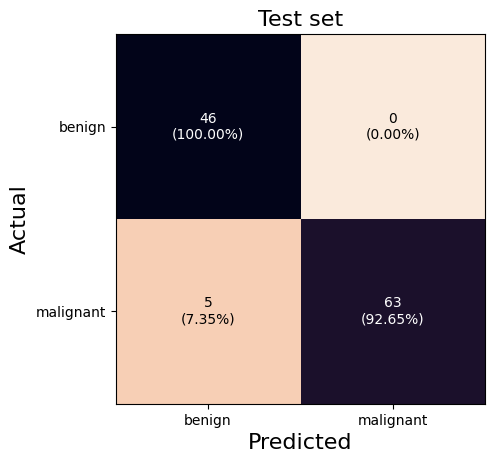

---------------------------------------
AUC validate: 0.9302
AUC test: 0.9632


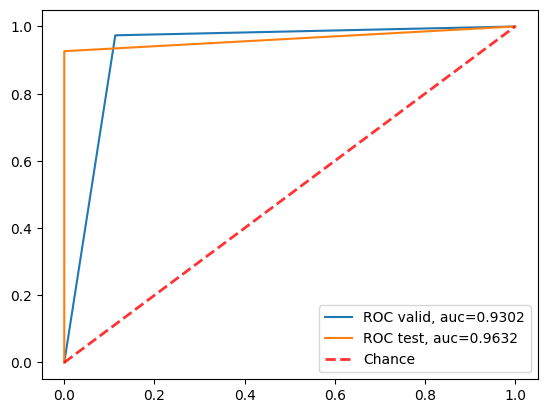

In [601]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split2 = sensitivity(cm_test)
spec_test_split2 = specificity(cm_test)
acc_test_split2 = accuracy(cm_test)
pre_test_split2 = precision(cm_test)
f1_test_split2 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split2 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split2)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split2))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split3

split3
############## validate set ################
Confusion Matrix
----------------
[[56 10]
 [ 1 24]] 

----------------
Sensitivity: 96.00%
Specificity: 84.85%
Accuracy: 87.91%
Precision: 70.59%
Sensitivity: 96.00%
Precision: 70.59%
F1: 81.36%


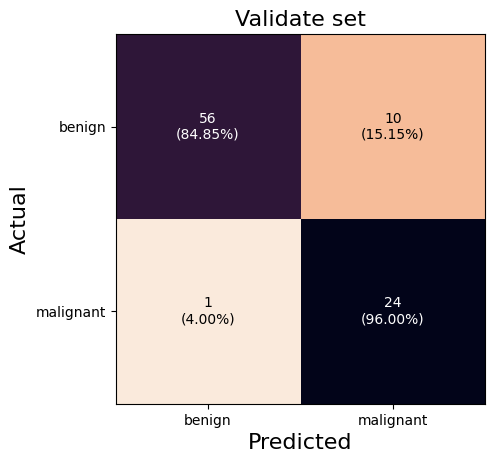

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 3 65]] 

----------------
Sensitivity: 95.59%
Specificity: 100.00%
Accuracy: 97.37%
Precision: 100.00%
Sensitivity: 95.59%
Precision: 100.00%
F1: 97.74%


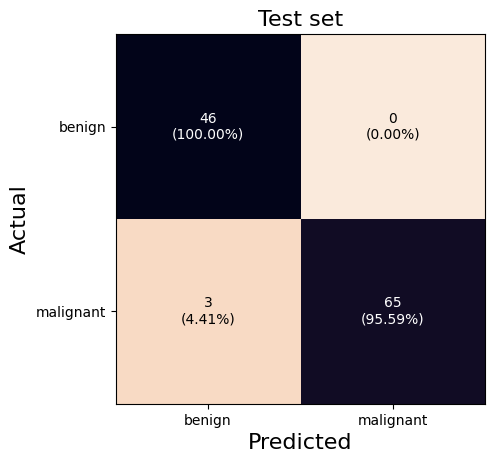

---------------------------------------
AUC validate: 0.9042
AUC test: 0.9779


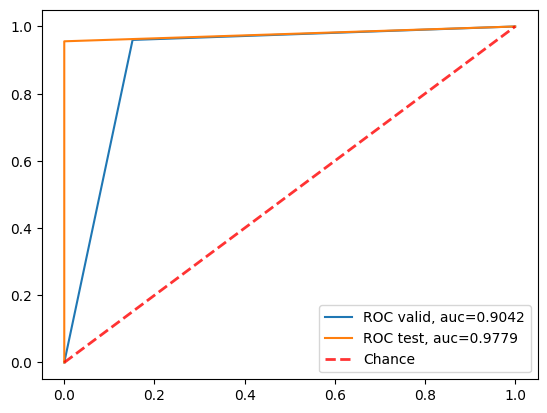

In [618]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split3 = sensitivity(cm_test)
spec_test_split3 = specificity(cm_test)
acc_test_split3 = accuracy(cm_test)
pre_test_split3 = precision(cm_test)
f1_test_split3 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split3 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split3)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split3))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split4

split4
############## validate set ################
Confusion Matrix
----------------
[[46 26]
 [ 0 19]] 

----------------
Sensitivity: 100.00%
Specificity: 63.89%
Accuracy: 71.43%
Precision: 42.22%
Sensitivity: 100.00%
Precision: 42.22%
F1: 59.37%


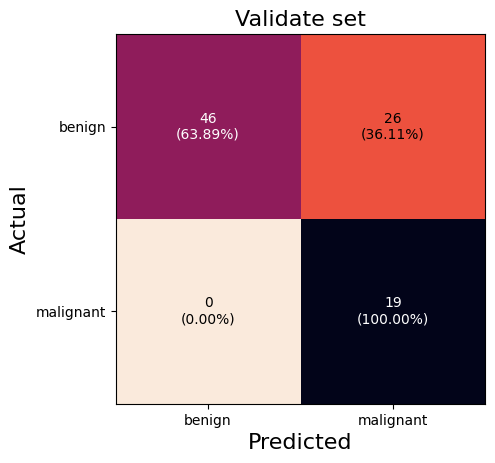

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 2 66]] 

----------------
Sensitivity: 97.06%
Specificity: 100.00%
Accuracy: 98.25%
Precision: 100.00%
Sensitivity: 97.06%
Precision: 100.00%
F1: 98.51%


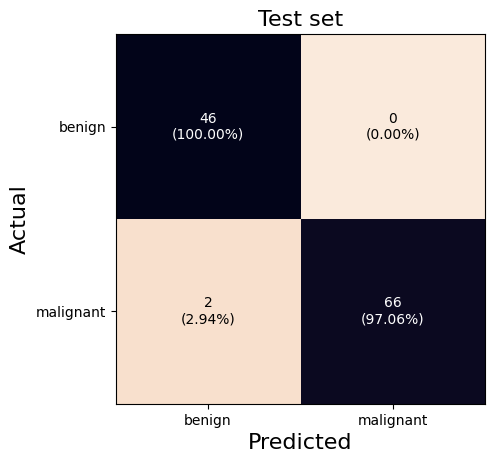

---------------------------------------
AUC validate: 0.8194
AUC test: 0.9853


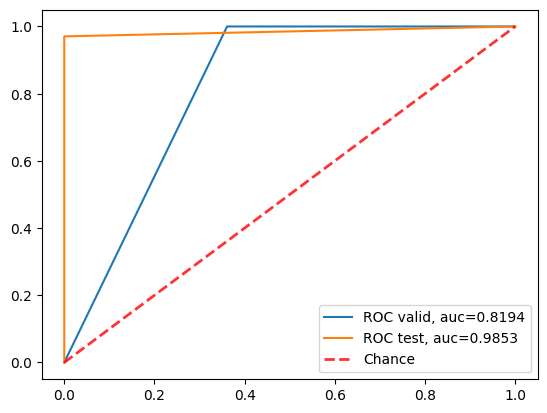

In [635]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split4 = sensitivity(cm_test)
spec_test_split4 = specificity(cm_test)
acc_test_split4 = accuracy(cm_test)
pre_test_split4 = precision(cm_test)
f1_test_split4 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split4 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split4)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split4))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split5

split5
############## validate set ################
Confusion Matrix
----------------
[[46 22]
 [ 0 23]] 

----------------
Sensitivity: 100.00%
Specificity: 67.65%
Accuracy: 75.82%
Precision: 51.11%
Sensitivity: 100.00%
Precision: 51.11%
F1: 67.65%


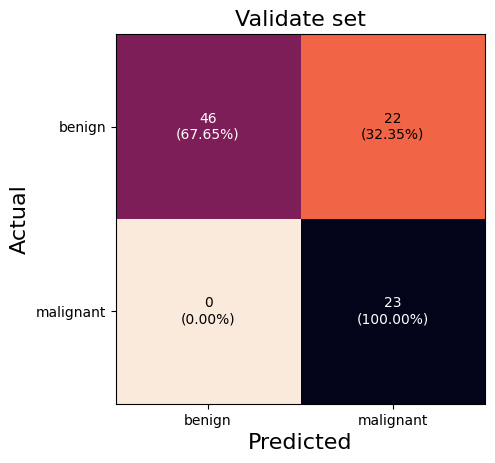

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 8 60]] 

----------------
Sensitivity: 88.24%
Specificity: 100.00%
Accuracy: 92.98%
Precision: 100.00%
Sensitivity: 88.24%
Precision: 100.00%
F1: 93.75%


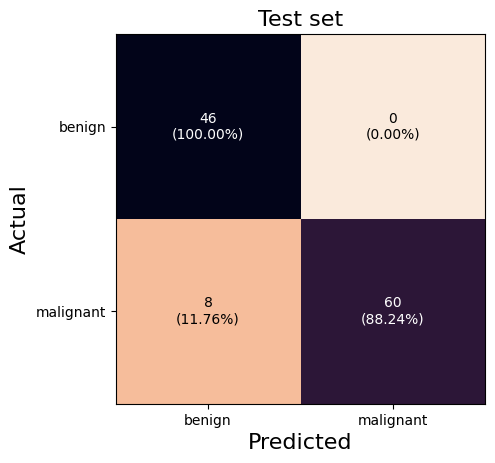

---------------------------------------
AUC validate: 0.8382
AUC test: 0.9412


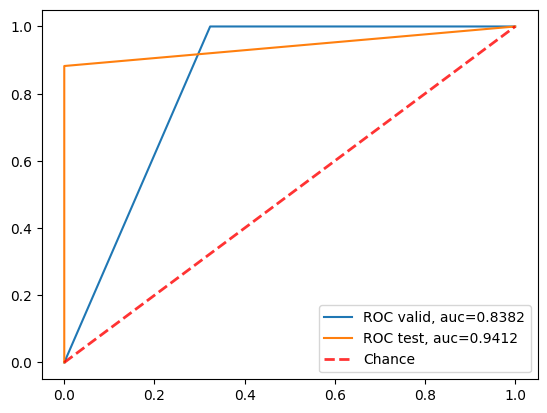

In [567]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = sgd_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = sgd_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split5 = sensitivity(cm_test)
spec_test_split5 = specificity(cm_test)
acc_test_split5 = accuracy(cm_test)
pre_test_split5 = precision(cm_test)
f1_test_split5 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split5 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split5)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### overall

In [636]:
test_split1 = np.array([[45, 1], [4, 64]])
test_split2 = np.array([[46, 0], [5, 63]])
test_split3 = np.array([[46, 0], [3, 65]])
test_split4 = np.array([[46, 0], [2, 66]])
test_split5 = np.array([[46, 0], [8, 60]])

In [637]:
overall_test = test_split1 + test_split2 + test_split3 + test_split4 + test_split5
print(overall_test)

[[229   1]
 [ 22 318]]


Text(0.5, 81.72222222222219, 'Predicted')

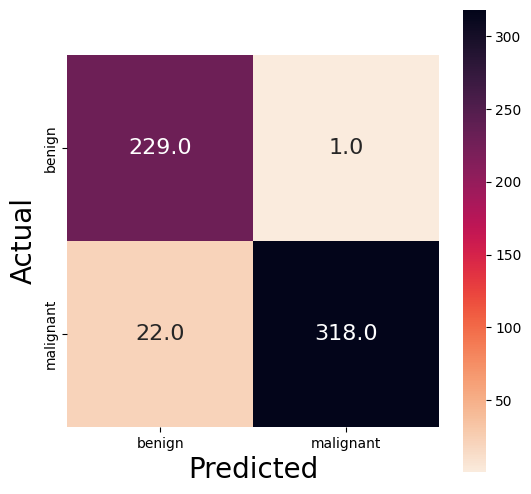

In [638]:
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
# ax = sns.heatmap(cmn, cmap="rocket_r", fmt=".4f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax = sns.heatmap(overall_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [639]:
sensitivity_values = []

sensitivity_values.append(sen_test_split1)
sensitivity_values.append(sen_test_split2)
sensitivity_values.append(sen_test_split3)
sensitivity_values.append(sen_test_split4)
sensitivity_values.append(sen_test_split5)

print(sensitivity_values)

# calculating the mean of sample set
mean_sensitivity = statistics.mean(sensitivity_values)
# Calculate standard deviation of sensitivity
sensitivity_sd = statistics.stdev(sensitivity_values)

print("Mean Sensitivity:", mean_sensitivity)
print("Sensitivity Standard Deviation:", sensitivity_sd)

# Print mean sensitivity with standard deviation
print("Overall Sensitivity: %.2f ± %.2f%%" % (mean_sensitivity, sensitivity_sd))

[94.11764705882352, 92.64705882352942, 95.58823529411765, 97.05882352941177, 88.23529411764706]
Mean Sensitivity: 93.52941176470588
Sensitivity Standard Deviation: 3.3855483627121594
Overall Sensitivity: 93.53 ± 3.39%


In [640]:
specificity_values = []

specificity_values.append(spec_test_split1)
specificity_values.append(spec_test_split2)
specificity_values.append(spec_test_split3)
specificity_values.append(spec_test_split4)
specificity_values.append(spec_test_split5)
    
print(specificity_values)

# calculating the mean of sample set
mean_specificity = statistics.mean(specificity_values)
# Calculate standard deviation of sensitivity
specificity_sd = statistics.stdev(specificity_values)

print("Mean Specificity:", mean_specificity)
print("Specificity Standard Deviation:", specificity_sd)

# Print mean specificity with standard deviation
print("Overall Specificity: %.2f ± %.2f%%" % (mean_specificity, specificity_sd))

[97.82608695652173, 100.0, 100.0, 100.0, 100.0]
Mean Specificity: 99.56521739130434
Specificity Standard Deviation: 0.9722034684781714
Overall Specificity: 99.57 ± 0.97%


In [641]:
accuracy_values = []

accuracy_values.append(acc_test_split1)
accuracy_values.append(acc_test_split2)
accuracy_values.append(acc_test_split3)
accuracy_values.append(acc_test_split4)
accuracy_values.append(acc_test_split5)
    
print(accuracy_values)

# calculating the mean of sample set
mean_accuracy = statistics.mean(accuracy_values)
# Calculate standard deviation of sensitivity
accuracy_sd = statistics.stdev(accuracy_values)

print("Mean accuracy:", mean_accuracy)
print("accuracy Standard Deviation:", accuracy_sd)

# Print mean accuracy with standard deviation
print("Overall accuracy: %.2f ± %.2f%%" % (mean_accuracy, accuracy_sd))

[95.6140350877193, 95.6140350877193, 97.36842105263158, 98.24561403508771, 92.98245614035088]
Mean accuracy: 95.96491228070175
accuracy Standard Deviation: 2.019449900565144
Overall accuracy: 95.96 ± 2.02%


In [642]:
precision_values = []

precision_values.append(pre_test_split1)
precision_values.append(pre_test_split2)
precision_values.append(pre_test_split3)
precision_values.append(pre_test_split4)
precision_values.append(pre_test_split5)
    
print(precision_values)

# calculating the mean of sample set
mean_precision = statistics.mean(precision_values)
# Calculate standard deviation of sensitivity
precision_sd = statistics.stdev(precision_values)

print("Mean precision:", mean_precision)
print("precision Standard Deviation:", precision_sd)

# Print mean specificity with standard deviation
print("Overall precision: %.2f ± %.2f%%" % (mean_precision, precision_sd))

[98.46153846153847, 100.0, 100.0, 100.0, 100.0]
Mean precision: 99.6923076923077
precision Standard Deviation: 0.688020916153779
Overall precision: 99.69 ± 0.69%


In [643]:
f1_values = []

f1_values.append(f1_test_split1)
f1_values.append(f1_test_split2)
f1_values.append(f1_test_split3)
f1_values.append(f1_test_split4)
f1_values.append(f1_test_split5)
    
print(f1_values)

# calculating the mean of sample set
mean_f1 = statistics.mean(f1_values)
# Calculate standard deviation of sensitivity
f1_sd = statistics.stdev(f1_values)

print("Mean f1:", mean_f1)
print("f1 Standard Deviation:", f1_sd)

# Print mean specificity with standard deviation
print("Overall f1: %.2f ± %.2f%%" % (mean_f1, f1_sd))

[96.2406015037594, 96.18320610687023, 97.74436090225565, 98.50746268656717, 93.75]
Mean f1: 96.48512623989049
f1 Standard Deviation: 1.8239641101114892
Overall f1: 96.49 ± 1.82%


In [645]:
auc_values = []

auc_values.append(auc_test_split1)
auc_values.append(auc_test_split2)
auc_values.append(auc_test_split3)
auc_values.append(auc_test_split4)
auc_values.append(auc_test_split5)
    
print(auc_values)

# calculating the mean of sample set
mean_auc = statistics.mean(auc_values)
# Calculate standard deviation of sensitivity
auc_sd = statistics.stdev(auc_values)

print("Mean auc:", mean_auc)
print("auc Standard Deviation:", auc_sd)

# Print mean auc with standard deviation
print("Overall auc: %.2f ± %.2f%%" % (mean_auc, auc_sd))

[0.9597186700767263, 0.9632352941176471, 0.9779411764705883, 0.9852941176470589, 0.9411764705882353]
Mean auc: 0.9654731457800512
auc Standard Deviation: 0.01715206336794913
Overall auc: 0.97 ± 0.02%
